## Final Project Submission

Please fill out:
* Student name: Orin Conn
* Student pace: full time
* Scheduled project review date/time: 
* Instructor name: Abhineet
* Blog post URL:


# Obtain Data

Let's begin by importing our initial libraries for exploration and quick analysis!

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import warnings                      #this ignores warnings that output when a piece of code is outdated
warnings.filterwarnings("ignore")

Let's import our data table and take a look at the number of entries for each column. From here, we will start thinking about what needs to be cleaned.

In [3]:
df = pd.read_csv('kc_house_data.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
id               21597 non-null int64
date             21597 non-null object
price            21597 non-null float64
bedrooms         21597 non-null int64
bathrooms        21597 non-null float64
sqft_living      21597 non-null int64
sqft_lot         21597 non-null int64
floors           21597 non-null float64
waterfront       19221 non-null float64
view             21534 non-null float64
condition        21597 non-null int64
grade            21597 non-null int64
sqft_above       21597 non-null int64
sqft_basement    21597 non-null object
yr_built         21597 non-null int64
yr_renovated     17755 non-null float64
zipcode          21597 non-null int64
lat              21597 non-null float64
long             21597 non-null float64
sqft_living15    21597 non-null int64
sqft_lot15       21597 non-null int64
dtypes: float64(8), int64(11), object(2)
memory usage: 3.5+ MB


In [4]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


# Scrub
## Dealing with missing values

Let's begin our scrubbing with assessing the missing values first. How many values from each category are missing?

In [5]:
df.isna().sum()

id                  0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2376
view               63
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3842
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

A decent amount of values for waterfront are missing. Let's map the waterfront houses by lat and long coordinates, to see if any of these null values are next to water.

In [6]:
df.waterfront.unique()

array([nan,  0.,  1.])

In [7]:
null_water = df[df.waterfront.isna()]
waterfront = df[df.waterfront == 1]
not_waterfront = df[df.waterfront == 0]

print(len(null_water))
print(len(waterfront))
print(len(not_waterfront))

2376
146
19075


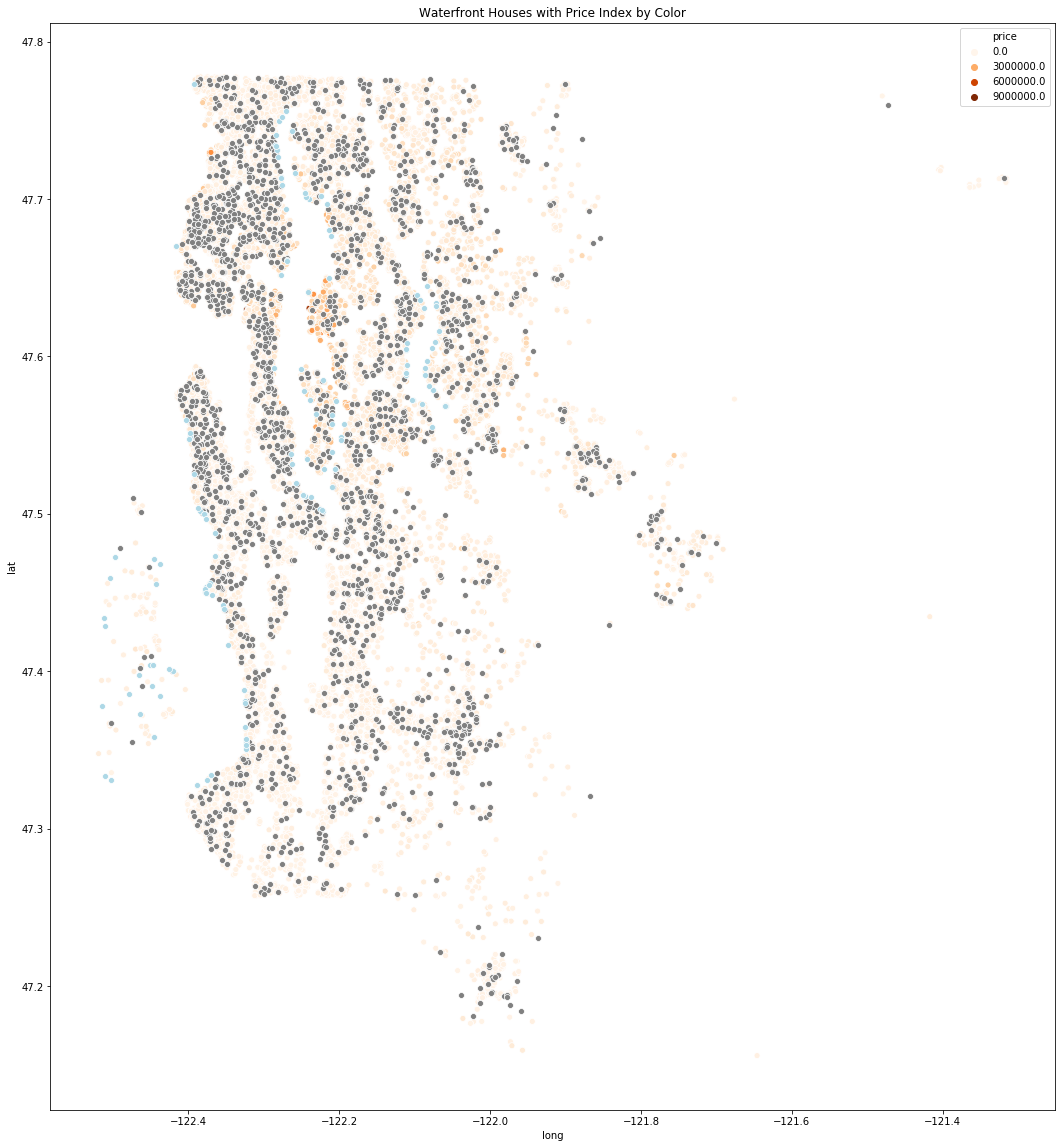

In [15]:
fig, ax = plt.subplots(figsize=(18,20))

sns.scatterplot(x='long', y='lat', hue='price', data=not_waterfront, palette='Oranges', ax=ax)
plt.title('Lat & Long Home Sales with Price Index by Color')
plt.legend(fancybox=True);

sns.scatterplot(x='long', y='lat', data=null_water, color='Grey', ax=ax)
plt.title('Lat & Long Home Sales with Price Index by Color')
plt.legend(fancybox=True);

sns.scatterplot(x='long', y='lat', data=waterfront, color = 'LightBlue', ax=ax)
plt.title('Waterfront Houses with Price Index by Color')
plt.legend(fancybox=True);

Judging by the scatterplot above (where non-waterfront houses are light orange, waterfront are light blue and null values are grey), there is not enough information to conclude which null values are waterfront. Many houses that appear to be on the border of water are not waterfront. 

If we randomly assign a proportionate amount of values to the null values, then some clearly non-waterfront houses will be assigned waterfront, albeit a very small percentage. Therefore we will just assign the median for null values, which is 0, or not-waterfront.

In [16]:
median = df.waterfront.median()
df.waterfront = df.waterfront.fillna(value=median)

In [17]:
df.waterfront.value_counts()

0.0    21451
1.0      146
Name: waterfront, dtype: int64

In [18]:
df.isna().sum()

id                  0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront          0
view               63
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3842
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

Let's move onto missing 'view' values.

In [19]:
df.view.value_counts()  #view = how many times the listing is viewed.

0.0    19422
2.0      957
3.0      508
1.0      330
4.0      317
Name: view, dtype: int64

Since there are only 63 missing values in view, let's drop those rows, or re-frame the data table without the na rows in this case.

In [20]:
df = df[df['view'].notna()]

In [21]:
df.isna().sum()

id                  0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront          0
view                0
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3830
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

Now let's inspect the yr_renovated column. There are quite a bit more missing values here, so we don't want to drop those rows.

In [22]:
df.yr_renovated.value_counts(normalize=True, dropna=False)

0.0       0.787638
NaN       0.177858
2014.0    0.003390
2003.0    0.001440
2013.0    0.001440
            ...   
1944.0    0.000046
1948.0    0.000046
1976.0    0.000046
1934.0    0.000046
1953.0    0.000046
Name: yr_renovated, Length: 71, dtype: float64

In [23]:
print ('Renovated:',  (df.yr_renovated == 0).sum())
print ('Not renovated:',(df.yr_renovated > 0).sum())

Renovated: 16961
Not renovated: 743


Since 78% of the houses have not been renovated, we can make a reasonable assumption that null values were left due to lack of renovation. Let's assign the median value again.

In [24]:
median = df.yr_renovated.median()
df.yr_renovated = df.yr_renovated.fillna(value=median)

In [25]:
df.isna().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21534 entries, 0 to 21596
Data columns (total 21 columns):
id               21534 non-null int64
date             21534 non-null object
price            21534 non-null float64
bedrooms         21534 non-null int64
bathrooms        21534 non-null float64
sqft_living      21534 non-null int64
sqft_lot         21534 non-null int64
floors           21534 non-null float64
waterfront       21534 non-null float64
view             21534 non-null float64
condition        21534 non-null int64
grade            21534 non-null int64
sqft_above       21534 non-null int64
sqft_basement    21534 non-null object
yr_built         21534 non-null int64
yr_renovated     21534 non-null float64
zipcode          21534 non-null int64
lat              21534 non-null float64
long             21534 non-null float64
sqft_living15    21534 non-null int64
sqft_lot15       21534 non-null int64
dtypes: float64(8), int64(11), object(2)
memory usage: 3.6+ MB


Let's pick at the object/string columns and look for irregular characters.

Date (date sold) is an object/string. Converting to datetime format now so we can potentially look at prices over time later.

In [27]:
import datetime as dt

df.date = pd.to_datetime(df.date)

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21534 entries, 0 to 21596
Data columns (total 21 columns):
id               21534 non-null int64
date             21534 non-null datetime64[ns]
price            21534 non-null float64
bedrooms         21534 non-null int64
bathrooms        21534 non-null float64
sqft_living      21534 non-null int64
sqft_lot         21534 non-null int64
floors           21534 non-null float64
waterfront       21534 non-null float64
view             21534 non-null float64
condition        21534 non-null int64
grade            21534 non-null int64
sqft_above       21534 non-null int64
sqft_basement    21534 non-null object
yr_built         21534 non-null int64
yr_renovated     21534 non-null float64
zipcode          21534 non-null int64
lat              21534 non-null float64
long             21534 non-null float64
sqft_living15    21534 non-null int64
sqft_lot15       21534 non-null int64
dtypes: datetime64[ns](1), float64(8), int64(11), object(1)
memory 

In [29]:
df.bedrooms.unique()

array([ 3,  2,  4,  5,  1,  6,  7,  8,  9, 11, 10, 33])

## Removing An Outlier

33 bedrooms... That's... a lot? Let's see what is going on there.

In [30]:
df[df.bedrooms > 9]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
8748,1773100755,2014-08-21,520000.0,11,3.00,3000,4960,2.0,0.0,0.0,...,7,2400,600.0,1918,1999.0,98106,47.5560,-122.363,1420,4960
13301,627300145,2014-08-14,1150000.0,10,5.25,4590,10920,1.0,0.0,2.0,...,9,2500,2090.0,2008,0.0,98004,47.5861,-122.113,2730,10400
15147,5566100170,2014-10-29,650000.0,10,2.00,3610,11914,2.0,0.0,0.0,...,7,3010,600.0,1958,0.0,98006,47.5705,-122.175,2040,11914
15856,2402100895,2014-06-25,640000.0,33,1.75,1620,6000,1.0,0.0,0.0,...,7,1040,580.0,1947,0.0,98103,47.6878,-122.331,1330,4700
19239,8812401450,2014-12-29,660000.0,10,3.00,2920,3745,2.0,0.0,0.0,...,7,1860,1060.0,1913,0.0,98105,47.6635,-122.320,1810,3745


Having less than 2 bathrooms for 33 bedroom just doesn't sound right. In addition, houses with 10 or 11 bedrooms have at least 2920 square-ft of space, whereas our 33-bedroom house only has 1620 square ft. Perhaps a typo? Let's filter that row out.

In [31]:
df = df[df.bedrooms != 33]

Making sure it is out:

In [32]:
df.bedrooms.unique()

array([ 3,  2,  4,  5,  1,  6,  7,  8,  9, 11, 10])

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21533 entries, 0 to 21596
Data columns (total 21 columns):
id               21533 non-null int64
date             21533 non-null datetime64[ns]
price            21533 non-null float64
bedrooms         21533 non-null int64
bathrooms        21533 non-null float64
sqft_living      21533 non-null int64
sqft_lot         21533 non-null int64
floors           21533 non-null float64
waterfront       21533 non-null float64
view             21533 non-null float64
condition        21533 non-null int64
grade            21533 non-null int64
sqft_above       21533 non-null int64
sqft_basement    21533 non-null object
yr_built         21533 non-null int64
yr_renovated     21533 non-null float64
zipcode          21533 non-null int64
lat              21533 non-null float64
long             21533 non-null float64
sqft_living15    21533 non-null int64
sqft_lot15       21533 non-null int64
dtypes: datetime64[ns](1), float64(8), int64(11), object(1)
memory 

In [34]:
for col in df.columns:
    print (col, '\n', df[col].unique(), '\n\n')

id 
 [7129300520 6414100192 5631500400 ... 1523300141  291310100 1523300157] 


date 
 ['2014-10-13T00:00:00.000000000' '2014-12-09T00:00:00.000000000'
 '2015-02-25T00:00:00.000000000' '2015-02-18T00:00:00.000000000'
 '2014-05-12T00:00:00.000000000' '2014-06-27T00:00:00.000000000'
 '2015-04-15T00:00:00.000000000' '2015-03-12T00:00:00.000000000'
 '2015-04-03T00:00:00.000000000' '2014-05-27T00:00:00.000000000'
 '2014-05-28T00:00:00.000000000' '2014-10-07T00:00:00.000000000'
 '2015-01-24T00:00:00.000000000' '2014-07-31T00:00:00.000000000'
 '2014-05-29T00:00:00.000000000' '2014-12-05T00:00:00.000000000'
 '2015-04-24T00:00:00.000000000' '2014-05-14T00:00:00.000000000'
 '2014-08-26T00:00:00.000000000' '2014-07-03T00:00:00.000000000'
 '2014-05-16T00:00:00.000000000' '2014-11-20T00:00:00.000000000'
 '2014-11-03T00:00:00.000000000' '2014-06-26T00:00:00.000000000'
 '2014-12-01T00:00:00.000000000' '2014-06-24T00:00:00.000000000'
 '2015-03-02T00:00:00.000000000' '2014-11-10T00:00:00.000000000'
 '2

It appears the only other noticeable issue right now is that 'sqft_basement' has a '?' in it's values. 

Let's fix that! 

In [35]:
df.sqft_basement.value_counts(normalize=True)

0.0       0.594344
?         0.020991
600.0     0.010031
500.0     0.009706
700.0     0.009613
            ...   
1024.0    0.000046
862.0     0.000046
2720.0    0.000046
2250.0    0.000046
276.0     0.000046
Name: sqft_basement, Length: 302, dtype: float64

We can see a question mark takes up 2% of the values. We could reasonably assume it to be due to the absence of a basement. Let's replace this value with the median, which is 0.0.

In [36]:
df.sqft_basement = df.sqft_basement.replace('?', '0.0')

In [37]:
df.sqft_basement.value_counts()

0.0       13250
600.0       216
500.0       209
700.0       207
800.0       201
          ...  
2400.0        1
3500.0        1
207.0         1
20.0          1
276.0         1
Name: sqft_basement, Length: 301, dtype: int64

In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21533 entries, 0 to 21596
Data columns (total 21 columns):
id               21533 non-null int64
date             21533 non-null datetime64[ns]
price            21533 non-null float64
bedrooms         21533 non-null int64
bathrooms        21533 non-null float64
sqft_living      21533 non-null int64
sqft_lot         21533 non-null int64
floors           21533 non-null float64
waterfront       21533 non-null float64
view             21533 non-null float64
condition        21533 non-null int64
grade            21533 non-null int64
sqft_above       21533 non-null int64
sqft_basement    21533 non-null object
yr_built         21533 non-null int64
yr_renovated     21533 non-null float64
zipcode          21533 non-null int64
lat              21533 non-null float64
long             21533 non-null float64
sqft_living15    21533 non-null int64
sqft_lot15       21533 non-null int64
dtypes: datetime64[ns](1), float64(8), int64(11), object(1)
memory 

df.replace has converted our sqft_basement column into an object series. Let's convert that back into float.

In [39]:
df.sqft_basement = df.sqft_basement.astype('float')

In [40]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.153300e+04,2.153300e+04,21533.000000,21533.000000,21533.000000,2.153300e+04,21533.000000,21533.000000,21533.000000,21533.000000,21533.000000,21533.000000,21533.000000,21533.000000,21533.000000,21533.000000,21533.000000,21533.000000,21533.000000,21533.000000
mean,4.582452e+09,5.400530e+05,3.371662,2.115729,2079.849208,1.509102e+04,1.494149,0.006734,0.233874,3.409650,7.657456,1788.592300,285.230623,1971.003390,68.869921,98077.938188,47.560174,-122.213943,1986.330423,12751.453397
std,2.876808e+09,3.660674e+05,0.904162,0.768616,917.462472,4.138112e+04,0.539808,0.081785,0.765702,0.650579,1.172661,827.749142,439.339704,29.376271,364.322710,53.507609,0.138529,0.140736,685.122310,27256.060980
min,1.000102e+06,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,3.000000,370.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123050e+09,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471200,-122.328000,1490.000000,5100.000000
50%,3.904950e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.617000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571900,-122.230000,1840.000000,7620.000000
75%,7.312200e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,550.000000,1997.000000,0.000000,98118.000000,47.678100,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,11.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


Now let's see if there are any duplicates, by checking the unique id number for each house in the data set.

In [41]:
duplicate_id = df[df.duplicated('id', keep=False)]
duplicate_id

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
93,6021501535,2014-07-25,430000.0,3,1.50,1580,5000,1.0,0.0,0.0,...,8,1290,290.0,1939,0.0,98117,47.6870,-122.386,1570,4500
94,6021501535,2014-12-23,700000.0,3,1.50,1580,5000,1.0,0.0,0.0,...,8,1290,290.0,1939,0.0,98117,47.6870,-122.386,1570,4500
313,4139480200,2014-06-18,1380000.0,4,3.25,4290,12103,1.0,0.0,3.0,...,11,2690,1600.0,1997,0.0,98006,47.5503,-122.102,3860,11244
314,4139480200,2014-12-09,1400000.0,4,3.25,4290,12103,1.0,0.0,3.0,...,11,2690,1600.0,1997,0.0,98006,47.5503,-122.102,3860,11244
324,7520000520,2014-09-05,232000.0,2,1.00,1240,12092,1.0,0.0,0.0,...,6,960,280.0,1922,1984.0,98146,47.4957,-122.352,1820,7460
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20654,8564860270,2015-03-30,502000.0,4,2.50,2680,5539,2.0,0.0,0.0,...,8,2680,0.0,2013,0.0,98045,47.4759,-121.734,2680,5992
20763,6300000226,2014-06-26,240000.0,4,1.00,1200,2171,1.5,0.0,0.0,...,7,1200,0.0,1933,0.0,98133,47.7076,-122.342,1130,1598
20764,6300000226,2015-05-04,380000.0,4,1.00,1200,2171,1.5,0.0,0.0,...,7,1200,0.0,1933,0.0,98133,47.7076,-122.342,1130,1598
21564,7853420110,2014-10-03,594866.0,3,3.00,2780,6000,2.0,0.0,0.0,...,9,2780,0.0,2013,0.0,98065,47.5184,-121.886,2850,6000


It appears there are a lot of duplicates! These appear to be resold houses. Let's find out of any of them were renovated.

In [42]:
duplicate_id.loc[duplicate_id['yr_renovated'] > 0.0]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
324,7520000520,2014-09-05,232000.0,2,1.00,1240,12092,1.0,0.0,0.0,...,6,960,280.0,1922,1984.0,98146,47.4957,-122.352,1820,7460
325,7520000520,2015-03-11,240500.0,2,1.00,1240,12092,1.0,0.0,0.0,...,6,960,280.0,1922,1984.0,98146,47.4957,-122.352,1820,7460
717,8820903380,2014-07-28,452000.0,6,2.25,2660,13579,2.0,0.0,0.0,...,7,2660,0.0,1937,1990.0,98125,47.7142,-122.286,1120,8242
718,8820903380,2015-01-02,730000.0,6,2.25,2660,13579,2.0,0.0,0.0,...,7,2660,0.0,1937,1990.0,98125,47.7142,-122.286,1120,8242
3946,1825069031,2014-08-14,550000.0,4,1.75,2410,8447,2.0,0.0,3.0,...,8,2060,350.0,1936,1980.0,98074,47.6499,-122.088,2520,14789
3947,1825069031,2014-10-16,550000.0,4,1.75,2410,8447,2.0,0.0,3.0,...,8,2060,350.0,1936,1980.0,98074,47.6499,-122.088,2520,14789
8426,1721801010,2014-09-03,225000.0,3,1.00,1790,6120,1.0,0.0,0.0,...,6,1790,0.0,1937,1964.0,98146,47.5080,-122.337,830,6120
8427,1721801010,2015-04-24,302100.0,3,1.00,1790,6120,1.0,0.0,0.0,...,6,1790,0.0,1937,1964.0,98146,47.5080,-122.337,830,6120


Only 4 of them were renovated, and not after they were resold. Let's drop the first instance of each duplicate, as the more recent sale will give us a slightly more accurate idea of the current price.

In [43]:
df.drop_duplicates(subset=['id'], keep='last', inplace=True)


In [44]:
len(df)


21356

## Checking for Other Outliers

In [45]:
def quick_scatter(df):
    for col in df.columns: 
        plt.scatter(df[col], df.price, label=col)
        plt.legend()
        plt.xlabel(col)
        plt.ylabel('price')
        plt.title(col)
        plt.show()  

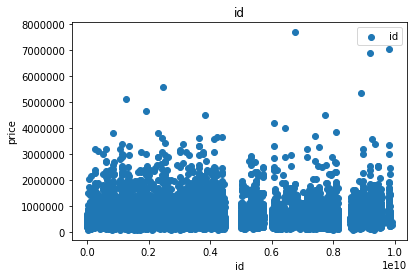

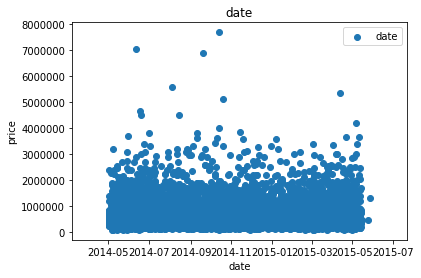

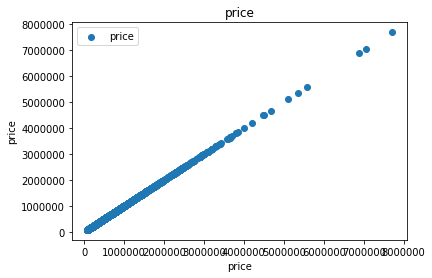

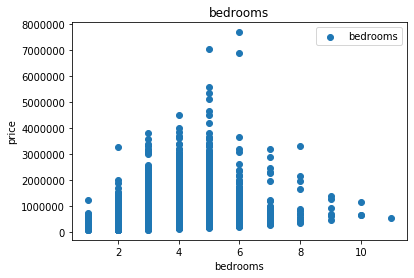

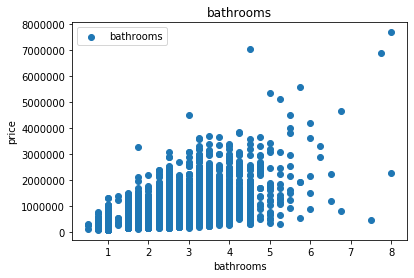

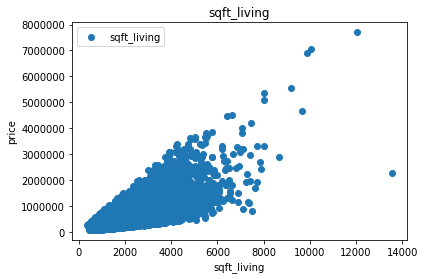

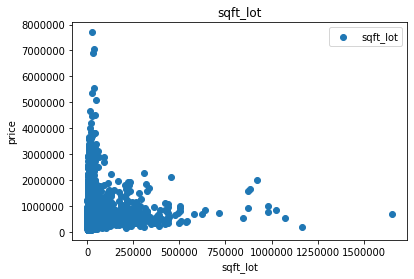

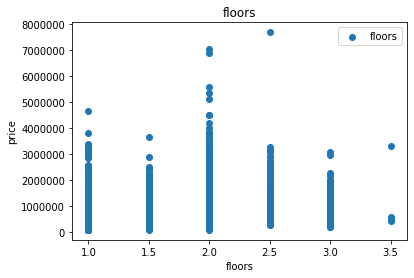

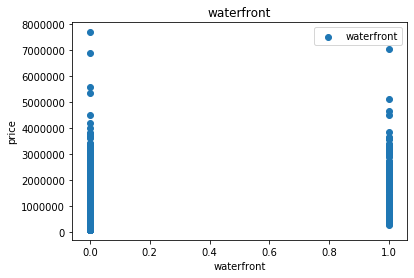

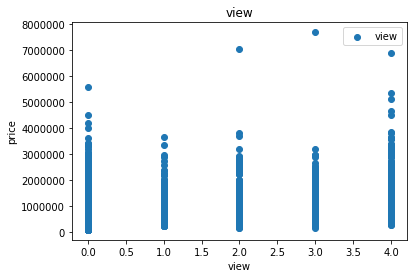

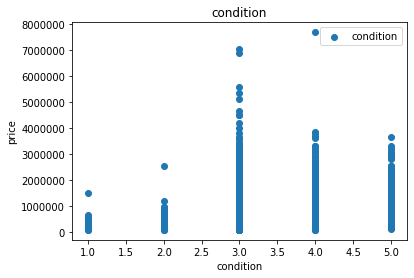

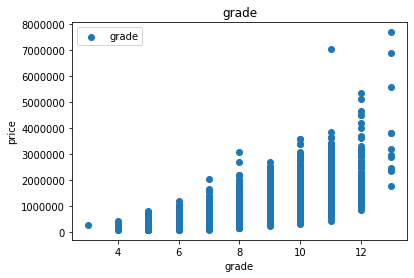

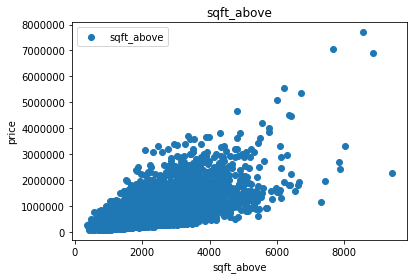

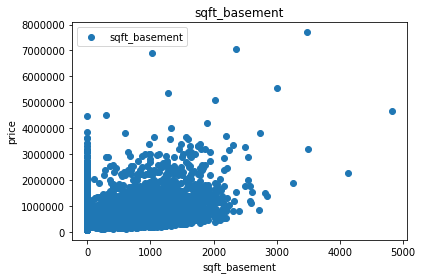

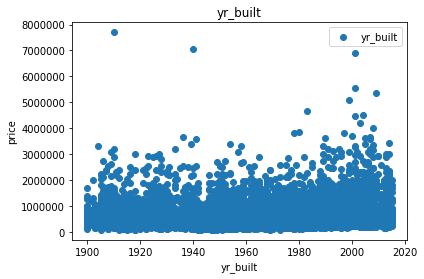

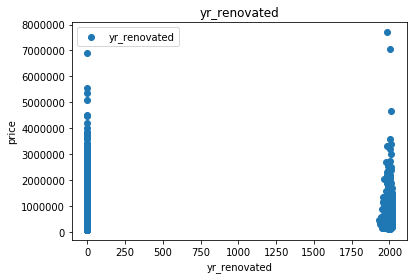

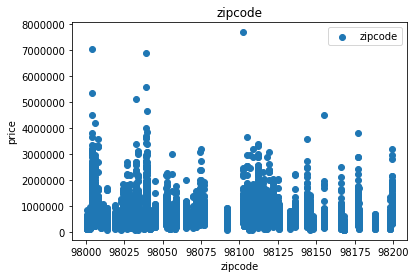

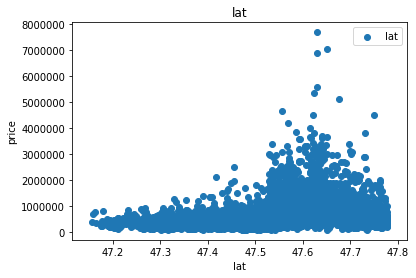

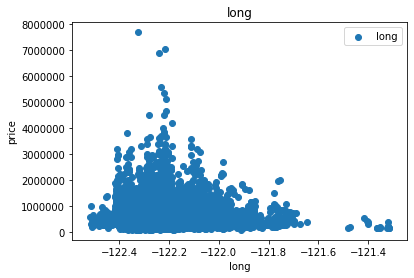

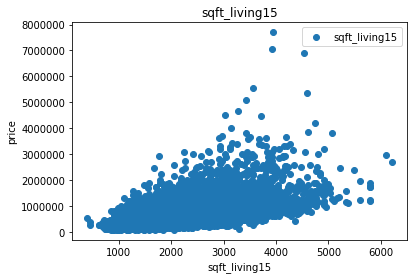

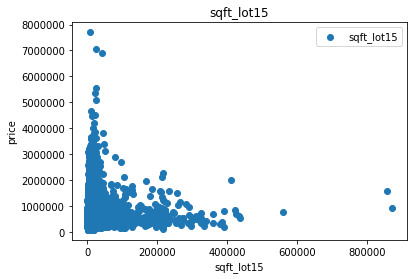

In [46]:
quick_scatter(df)

There are a few outliers which stand out especially in sqft_lot & sqft_lot15. These undoubtedly will slightly skew our baseline model in some way. Let's import scipystats and take out any values from our table that are over 3 standard deviations from the mean of their respective columns.

In [47]:
from scipy import stats
cleaned_df = df[(np.abs(stats.zscore(df.sqft_lot)) < 3)]

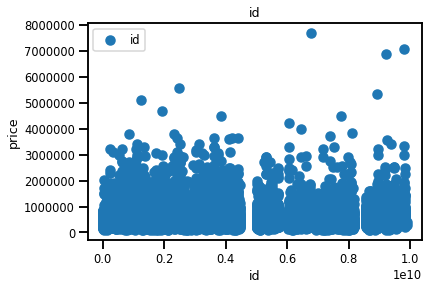

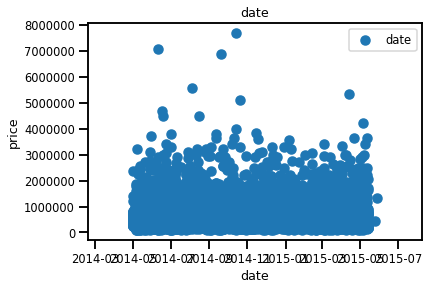

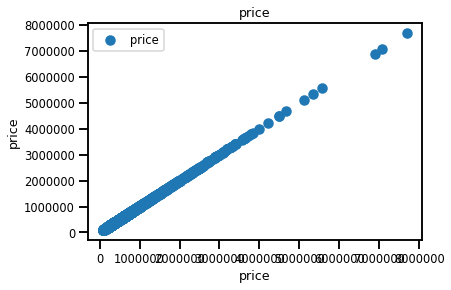

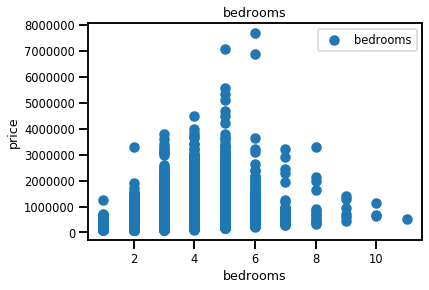

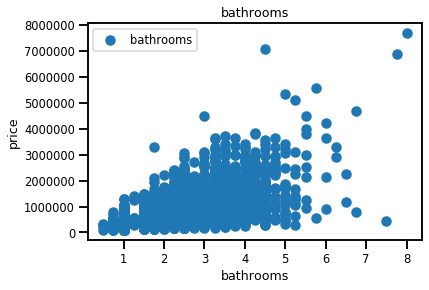

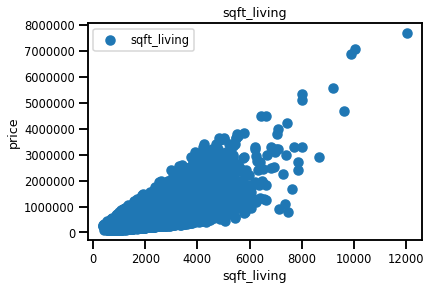

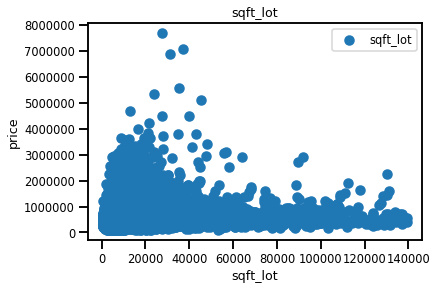

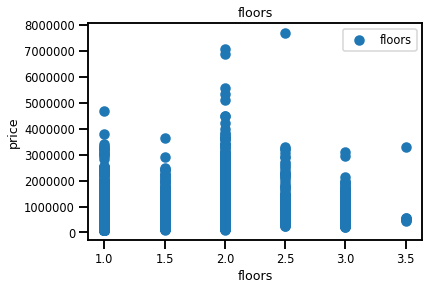

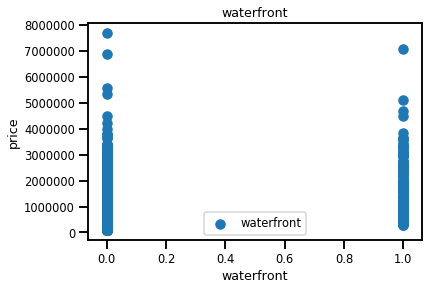

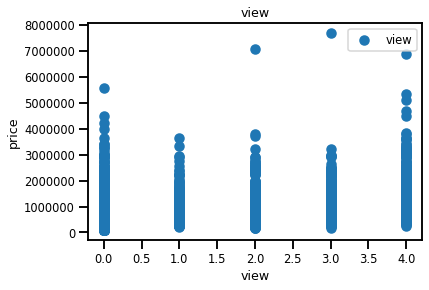

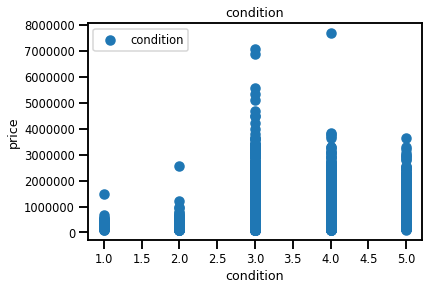

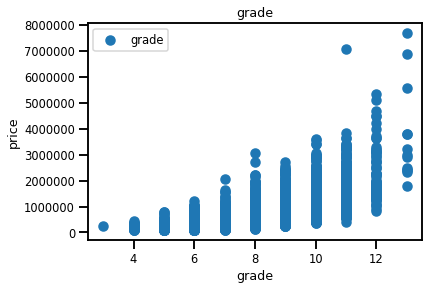

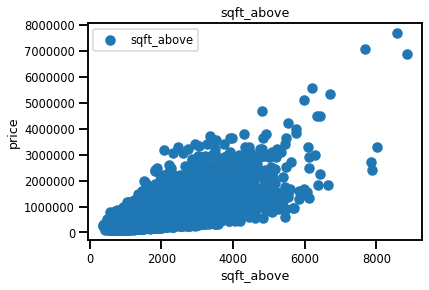

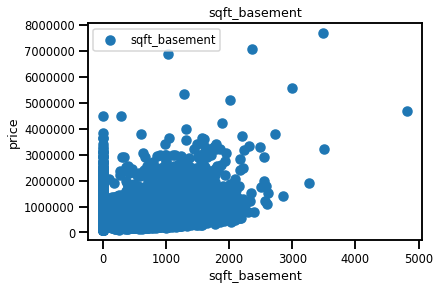

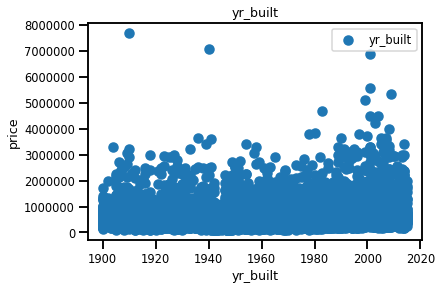

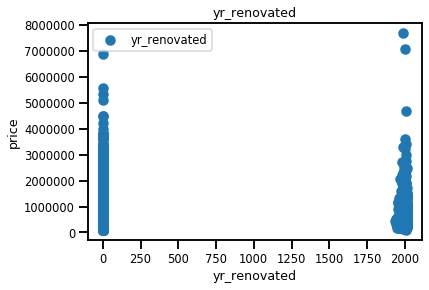

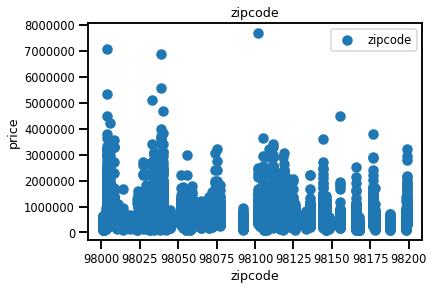

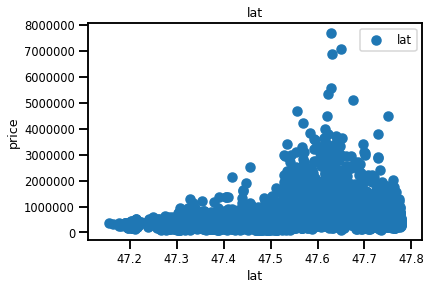

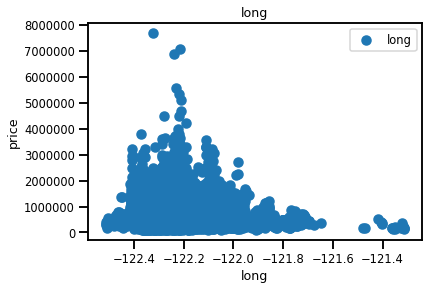

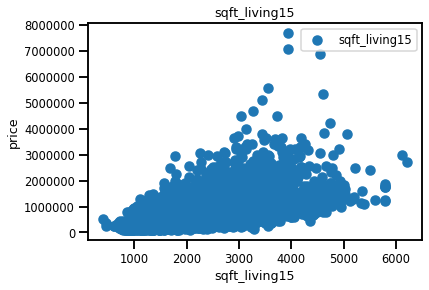

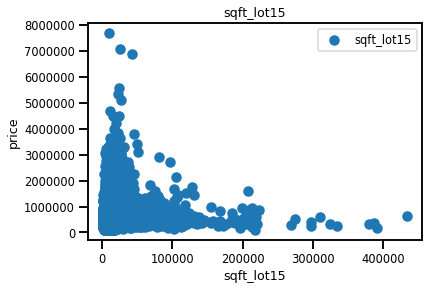

In [47]:
quick_scatter(cleaned_df)

## Checking for Initial multicollinearity
Now that we've cleaned up our missing values, let's look at the initial distributions and potential multicollinearity.



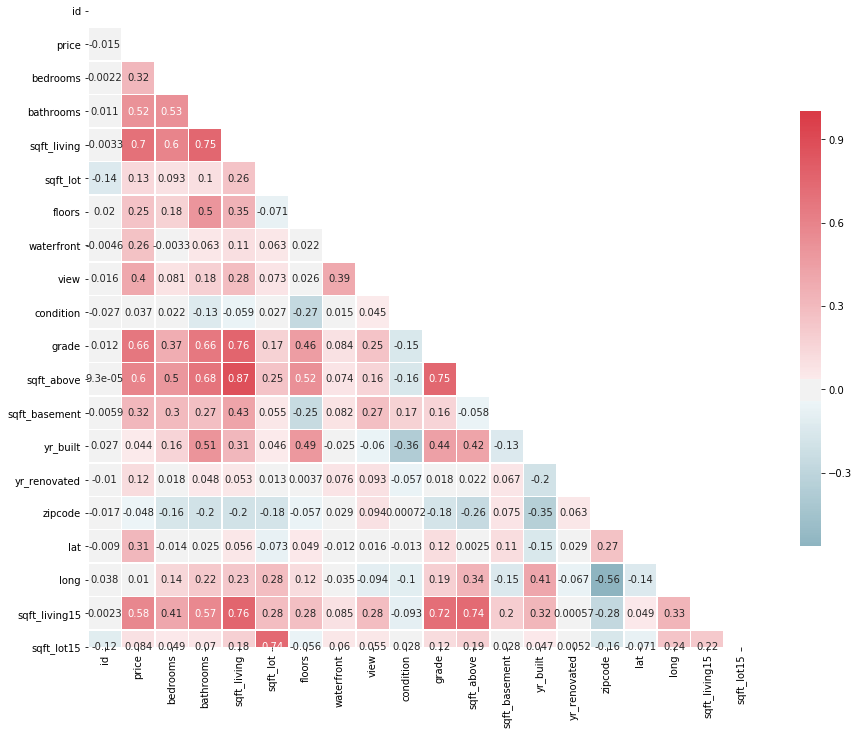

In [41]:
corr = cleaned_df.corr()
mask = np.triu(np.ones_like(corr, dtype=np.bool))

f, ax = plt.subplots(figsize=(15, 20))

cmap = sns.diverging_palette(220, 10, as_cmap=True)

sns.heatmap(corr, mask=mask, cmap=cmap, vmax=1, center=0,
            square=True, annot=True, linewidths=.5, cbar_kws={"shrink": .4});

An initial glance at the correlation heatmap above shows that some variable pairs that stand out with considerable correlation, which is denoted by the darker values of red and blue.

Let's utilize a function that returns a dataframe of pairs that are highly correlated (> 0.75).

In [42]:
def high_correlated_pairs(df):

    correlation_df = df.corr().abs().stack().reset_index().sort_values(0, ascending=False)

    # zip the variable name columns (Which were only named level_0 and level_1 by default) in a new column named "pairs"
    correlation_df['pairs'] = list(zip(correlation_df.level_0, correlation_df.level_1))

    # set index to pairs
    correlation_df.set_index(['pairs'], inplace = True)

    #drop level columns
    correlation_df.drop(columns=['level_1', 'level_0'], inplace = True)

    # rename correlation column as cc rather than 0
    correlation_df.columns = ['cc']

    # drop duplicates. 
    correlation_df.drop_duplicates(inplace=True)
    
    return correlation_df[(correlation_df.cc>.75) & (correlation_df.cc <1)]

In [43]:
high_correlated_pairs(cleaned_df)

,cc
pairs,
"(sqft_above, sqft_living)",0.873214
"(sqft_living15, sqft_living)",0.761147
"(sqft_living, grade)",0.760627
"(grade, sqft_above)",0.754012
"(sqft_living, bathrooms)",0.751141


We have 5 pairs of variables with high collinearity. This as these variable appear to have an effect on each other, they will distort our linear regression model and therefore should be dealt with. 

Let's clean up some of this by dropping one of the variables, sqft_living, as this variable is present in 4/5 of the pairs. 

The remaining collinear variables, sqft_above & grade, we will keep for now, as their variables represent two entirely different measurements, area and condition.

In [44]:
cleaned_df.drop(['sqft_living'], axis=1, inplace=True)
cleaned_df.head()


,id,date,price,bedrooms,bathrooms,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,2014-10-13,221900.0,3,1.00,5650,1.0,0.0,0.0,3,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,2014-12-09,538000.0,3,2.25,7242,2.0,0.0,0.0,3,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2015-02-25,180000.0,2,1.00,10000,1.0,0.0,0.0,3,6,770,0.0,1933,0.0,98028,47.7379,-122.233,2720,8062
3,2487200875,2014-12-09,604000.0,4,3.00,5000,1.0,0.0,0.0,5,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2015-02-18,510000.0,3,2.00,8080,1.0,0.0,0.0,3,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


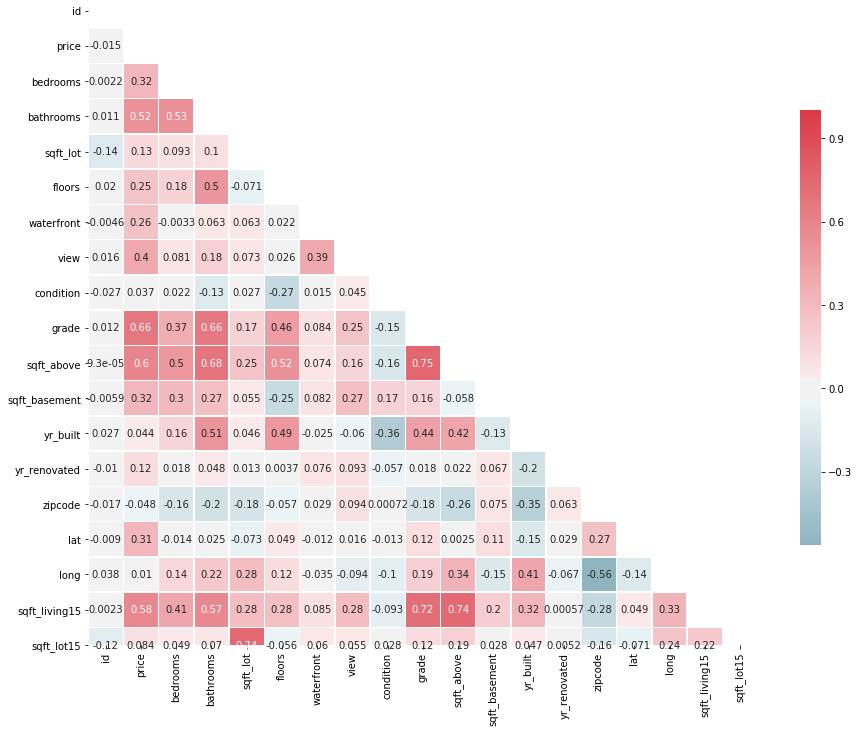

In [45]:
corr = cleaned_df.corr()
mask = np.triu(np.ones_like(corr, dtype=np.bool))

f, ax = plt.subplots(figsize=(15, 20))

cmap = sns.diverging_palette(220, 10, as_cmap=True)

sns.heatmap(corr, mask=mask, cmap=cmap, vmax=1, center=0,
            square=True, annot=True, linewidths=.5, cbar_kws={"shrink": .4});

## Dealing with Categorical Variables

We already have a good idea of which variables are discrete/categorical. We will need to deal with these in order to run a proper regression model. Let's see the number of unique values for each column.

In [46]:
cleaned_df.nunique()

id               21016
date               371
price             3563
bedrooms            11
bathrooms           29
sqft_lot          9489
floors               6
waterfront           2
view                 5
condition            5
grade               11
sqft_above         919
sqft_basement      297
yr_built           116
yr_renovated        70
zipcode             70
lat               4984
long               717
sqft_living15      770
sqft_lot15        8462
dtype: int64

Let's separate into 2 lists, the categorical columns at having 70 or less unique values, and continuous variables at having more than 70 unique values.

In [47]:
cats = []
conts = []

for col in cleaned_df.columns:
    if cleaned_df[col].nunique() <= 70:
        cats.append(col)
    else:
        conts.append(col)
        
print(cats)
print(conts)

['bedrooms', 'bathrooms', 'floors', 'waterfront', 'view', 'condition', 'grade', 'yr_renovated', 'zipcode']
['id', 'date', 'price', 'sqft_lot', 'sqft_above', 'sqft_basement', 'yr_built', 'lat', 'long', 'sqft_living15', 'sqft_lot15']


In order to create a multiple linear regression model later, we are going to need to one-hot-encode (create dummy variables of) these categorical variables, and bin some of them as well.



### 'bedrooms'

Let's start with one-hot encoding 'bedrooms'.

In [48]:
bedroom_dummies = pd.get_dummies(cleaned_df['bedrooms'], prefix='bed', drop_first=True)
cleaned_df = cleaned_df.drop(['bedrooms'], axis=1)
clean_df1 = pd.concat([cleaned_df, bedroom_dummies], axis=1)
clean_df1.head(2)

,id,date,price,bathrooms,sqft_lot,floors,waterfront,view,condition,grade,...,bed_2,bed_3,bed_4,bed_5,bed_6,bed_7,bed_8,bed_9,bed_10,bed_11
0,7129300520,2014-10-13,221900.0,1.00,5650,1.0,0.0,0.0,3,7,...,0,1,0,0,0,0,0,0,0,0
1,6414100192,2014-12-09,538000.0,2.25,7242,2.0,0.0,0.0,3,7,...,0,1,0,0,0,0,0,0,0,0


Since bathrooms has 29 unique values that only span between .5 and 8 bathrooms, let's bin them.
### 'bathrooms'

In [49]:
clean_df1.bathrooms.unique()

array([1.  , 2.25, 3.  , 2.  , 4.5 , 2.5 , 1.75, 2.75, 1.5 , 3.25, 4.  ,
       3.5 , 0.75, 4.75, 5.  , 4.25, 3.75, 1.25, 5.25, 0.5 , 5.5 , 6.75,
       6.  , 5.75, 8.  , 7.5 , 7.75, 6.25, 6.5 ])

In [50]:
bins = [0, 1, 2, 3, 4, 5, 6, 7, 8]
bins_bath = pd.cut(clean_df1['bathrooms'], bins)
bins_bath = bins_bath.cat.as_ordered()
bins_bath.head()

0    (0, 1]
1    (2, 3]
2    (0, 1]
3    (2, 3]
4    (1, 2]
Name: bathrooms, dtype: category
Categories (8, interval[int64]): [(0, 1] < (1, 2] < (2, 3] < (3, 4] < (4, 5] < (5, 6] < (6, 7] < (7, 8]]

In [51]:
clean_df1['bathrooms'] = bins_bath
clean_df1['bathrooms'] = clean_df1['bathrooms'].cat.codes
bathroom_dummy = pd.get_dummies(bins_bath, prefix='baths', drop_first=True)
clean_df1 = clean_df1.drop(['bathrooms'], axis=1)
clean_df2 = pd.concat([clean_df1, bathroom_dummy], axis=1)
clean_df2.head(2)

,id,date,price,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,...,bed_9,bed_10,bed_11,"baths_(1, 2]","baths_(2, 3]","baths_(3, 4]","baths_(4, 5]","baths_(5, 6]","baths_(6, 7]","baths_(7, 8]"
0,7129300520,2014-10-13,221900.0,5650,1.0,0.0,0.0,3,7,1180,...,0,0,0,0,0,0,0,0,0,0
1,6414100192,2014-12-09,538000.0,7242,2.0,0.0,0.0,3,7,2170,...,0,0,0,0,1,0,0,0,0,0


### 'floors'

In [52]:
clean_df2.floors.nunique()

6

In [53]:
floor_dummies = pd.get_dummies(clean_df2['floors'], prefix='floor', drop_first=True)
clean_df2 = clean_df2.drop(['floors'], axis=1)
clean_df3 = pd.concat([clean_df2, floor_dummies], axis=1)
clean_df3.head(2)

,id,date,price,sqft_lot,waterfront,view,condition,grade,sqft_above,sqft_basement,...,"baths_(3, 4]","baths_(4, 5]","baths_(5, 6]","baths_(6, 7]","baths_(7, 8]",floor_1.5,floor_2.0,floor_2.5,floor_3.0,floor_3.5
0,7129300520,2014-10-13,221900.0,5650,0.0,0.0,3,7,1180,0.0,...,0,0,0,0,0,0,0,0,0,0
1,6414100192,2014-12-09,538000.0,7242,0.0,0.0,3,7,2170,400.0,...,0,0,0,0,0,0,1,0,0,0


### 'waterfront'

In [54]:
clean_df3.waterfront.nunique()

2

Since waterfront is already a binary category, we won't need to one-hot encode this.

### 'view'

In [55]:
view_dummies = pd.get_dummies(clean_df3['view'], prefix='view', drop_first=True)
clean_df3 = clean_df3.drop(['view'], axis=1)
clean_df4 = pd.concat([clean_df3, view_dummies], axis=1)
clean_df4.head(2)

,id,date,price,sqft_lot,waterfront,condition,grade,sqft_above,sqft_basement,yr_built,...,"baths_(7, 8]",floor_1.5,floor_2.0,floor_2.5,floor_3.0,floor_3.5,view_1.0,view_2.0,view_3.0,view_4.0
0,7129300520,2014-10-13,221900.0,5650,0.0,3,7,1180,0.0,1955,...,0,0,0,0,0,0,0,0,0,0
1,6414100192,2014-12-09,538000.0,7242,0.0,3,7,2170,400.0,1951,...,0,0,1,0,0,0,0,0,0,0


### 'condition'

In [56]:
cond_dummies = pd.get_dummies(clean_df4['condition'], prefix='condition', drop_first=True)
clean_df4 = clean_df4.drop(['condition'], axis=1)
clean_df5 = pd.concat([clean_df4, cond_dummies], axis=1)
clean_df5.head(2)

,id,date,price,sqft_lot,waterfront,grade,sqft_above,sqft_basement,yr_built,yr_renovated,...,floor_3.0,floor_3.5,view_1.0,view_2.0,view_3.0,view_4.0,condition_2,condition_3,condition_4,condition_5
0,7129300520,2014-10-13,221900.0,5650,0.0,7,1180,0.0,1955,0.0,...,0,0,0,0,0,0,0,1,0,0
1,6414100192,2014-12-09,538000.0,7242,0.0,7,2170,400.0,1951,1991.0,...,0,0,0,0,0,0,0,1,0,0


###  'grade'
Grade we will bin to make ease the number of categorical columns in our model.

In [57]:
bins = [3, 5, 7, 9, 13]
bins_grade = pd.cut(clean_df5['grade'], bins)
bins_grade = bins_grade.cat.as_ordered()
bins_grade.head()

0    (5, 7]
1    (5, 7]
2    (5, 7]
3    (5, 7]
4    (7, 9]
Name: grade, dtype: category
Categories (4, interval[int64]): [(3, 5] < (5, 7] < (7, 9] < (9, 13]]

In [58]:
clean_df5['grade'] = bins_grade
clean_df5['grade'] = clean_df5['grade'].cat.codes
grade_dummies = pd.get_dummies(bins_grade, prefix='grade', drop_first=True)
clean_df5 = clean_df5.drop(['grade'], axis=1)
clean_df6 = pd.concat([clean_df5, grade_dummies], axis=1)
clean_df6.head(2)

,id,date,price,sqft_lot,waterfront,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,...,view_2.0,view_3.0,view_4.0,condition_2,condition_3,condition_4,condition_5,"grade_(5, 7]","grade_(7, 9]","grade_(9, 13]"
0,7129300520,2014-10-13,221900.0,5650,0.0,1180,0.0,1955,0.0,98178,...,0,0,0,0,1,0,0,1,0,0
1,6414100192,2014-12-09,538000.0,7242,0.0,2170,400.0,1951,1991.0,98125,...,0,0,0,0,1,0,0,1,0,0


### 'yr_renovated'

As a major portion of these houses have a 0.0, which we can assume means not renovated, let's convert this column into a binary yes or no value if it has been renovated.

In [59]:
clean_df6.loc[clean_df6['yr_renovated'] == 0.0 , 'yr_renovated'] = 0
clean_df6.loc[clean_df6['yr_renovated'] > 0.0, 'yr_renovated'] = 1

clean_df6.yr_renovated.unique()

array([0., 1.])

As we yr_renovated is now already binary, we won't need to one-hot encode this column/variable.

### 'zipcode'

Location and price are likely to have some correlation here. Let's investigate this quickly, before we decide what to do.

In [60]:
clean_df6.zipcode.nunique()

70

In [61]:
clean_df6.zipcode.value_counts()

98103    598
98115    573
98052    570
98038    553
98117    548
        ... 
98070     92
98010     85
98148     56
98024     54
98039     49
Name: zipcode, Length: 70, dtype: int64

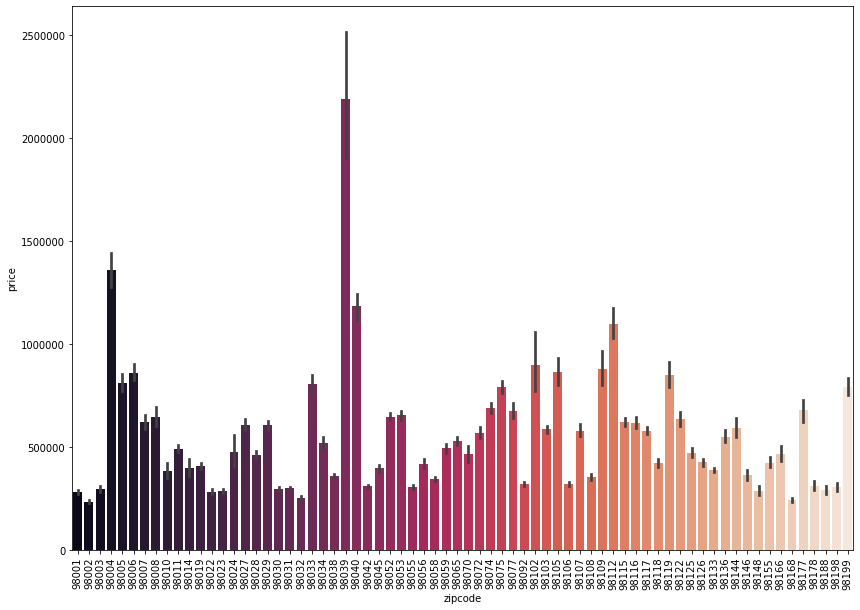

In [62]:
x = clean_df6.zipcode
y1 = clean_df6.price
plt.figure(figsize=(14,10))
sns.barplot(x=x, y=y1, palette="rocket", color="k")
plt.xticks(rotation=90)
plt.show()

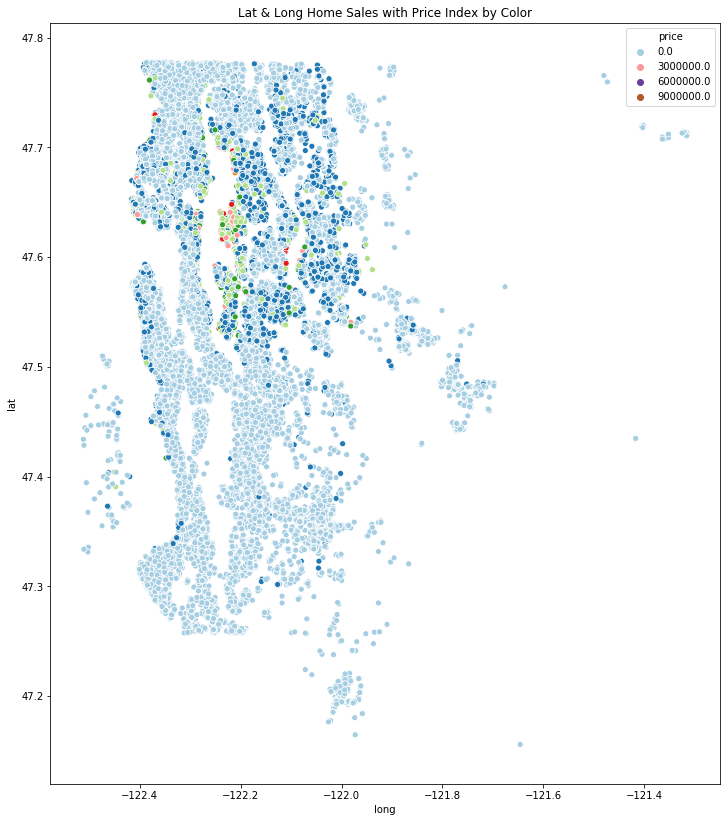

In [63]:
plt.figure(figsize=(12,14))
sns.scatterplot(x='long', y='lat', hue='price', data=clean_df6, palette='Paired')
plt.title('Lat & Long Home Sales with Price Index by Color')
plt.legend(fancybox=True);

70 unique values is a lot to one-hot encode. Let's bin the location by creating quadrants of latitude ('lat') and longitude ('long'), based on our scatterplot visualization and then drop zipcode. 

In [90]:
df_test = clean_df6.copy()

In [91]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21016 entries, 0 to 21596
Data columns (total 47 columns):
id               21016 non-null int64
date             21016 non-null datetime64[ns]
price            21016 non-null float64
sqft_lot         21016 non-null int64
waterfront       21016 non-null float64
sqft_above       21016 non-null int64
sqft_basement    21016 non-null float64
yr_built         21016 non-null int64
yr_renovated     21016 non-null float64
zipcode          21016 non-null int64
lat              21016 non-null float64
long             21016 non-null float64
sqft_living15    21016 non-null int64
sqft_lot15       21016 non-null int64
bed_2            21016 non-null uint8
bed_3            21016 non-null uint8
bed_4            21016 non-null uint8
bed_5            21016 non-null uint8
bed_6            21016 non-null uint8
bed_7            21016 non-null uint8
bed_8            21016 non-null uint8
bed_9            21016 non-null uint8
bed_10           21016 non-null ui

In [92]:
df_test.lat.isna().sum()

0

We are assigning the divided latitude and longitude into 4 sectors, 1, 2, 3, & 4.

In [177]:
sectors  = [(df_test['lat'] >= 47.5 ) & (df_test['long'] > -122.25), 
            (df_test['lat'] >= 47.5 ) & (df_test['long'] <= -122.25),
            (df_test['lat'] < 47.5 ) & (df_test['long'] > -122.25),
            (df_test['lat'] < 47.5 ) & (df_test['long'] <= -122.25),
            ]
choices     = [ "1", "2", "3", "4"]

df_test["sector"] = np.select(sectors, choices, default=np.nan)

In [178]:
df_test.sector.value_counts()

2    7773
1    6923
3    3966
4    2354
Name: sector, dtype: int64

Now let's one-hot encode our sector column.

In [179]:
sector_dummies = pd.get_dummies(df_test['sector'], prefix='sector', drop_first=True)
df_test = df_test.drop(['sector'], axis=1)
last_df = pd.concat([df_test, sector_dummies], axis=1)
last_df.head(2)

,id,date,price,sqft_lot,waterfront,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,...,condition_2,condition_3,condition_4,condition_5,"grade_(5, 7]","grade_(7, 9]","grade_(9, 13]",sector_2,sector_3,sector_4
0,7129300520,2014-10-13,221900.0,5650,0.0,1180,0.0,1955,0.0,98178,...,0,1,0,0,1,0,0,1,0,0
1,6414100192,2014-12-09,538000.0,7242,0.0,2170,400.0,1951,1.0,98125,...,0,1,0,0,1,0,0,1,0,0


In [96]:
last_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21016 entries, 0 to 21596
Data columns (total 50 columns):
id               21016 non-null int64
date             21016 non-null datetime64[ns]
price            21016 non-null float64
sqft_lot         21016 non-null int64
waterfront       21016 non-null float64
sqft_above       21016 non-null int64
sqft_basement    21016 non-null float64
yr_built         21016 non-null int64
yr_renovated     21016 non-null float64
zipcode          21016 non-null int64
lat              21016 non-null float64
long             21016 non-null float64
sqft_living15    21016 non-null int64
sqft_lot15       21016 non-null int64
bed_2            21016 non-null uint8
bed_3            21016 non-null uint8
bed_4            21016 non-null uint8
bed_5            21016 non-null uint8
bed_6            21016 non-null uint8
bed_7            21016 non-null uint8
bed_8            21016 non-null uint8
bed_9            21016 non-null uint8
bed_10           21016 non-null ui

Looking good. Now let's drop those initial columns we just worked on.

In [180]:
last_df = last_df.drop(['zipcode', 'lat', 'long'], axis=1)
last_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21016 entries, 0 to 21596
Data columns (total 47 columns):
id               21016 non-null int64
date             21016 non-null datetime64[ns]
price            21016 non-null float64
sqft_lot         21016 non-null int64
waterfront       21016 non-null float64
sqft_above       21016 non-null int64
sqft_basement    21016 non-null float64
yr_built         21016 non-null int64
yr_renovated     21016 non-null float64
sqft_living15    21016 non-null int64
sqft_lot15       21016 non-null int64
bed_2            21016 non-null uint8
bed_3            21016 non-null uint8
bed_4            21016 non-null uint8
bed_5            21016 non-null uint8
bed_6            21016 non-null uint8
bed_7            21016 non-null uint8
bed_8            21016 non-null uint8
bed_9            21016 non-null uint8
bed_10           21016 non-null uint8
bed_11           21016 non-null uint8
baths_(1, 2]     21016 non-null uint8
baths_(2, 3]     21016 non-null uint8


### 'sqft_basement'
Before we move on, there is something that we noticed earlier in our quick scatterplot run. Our sqft basement variable has a peculiar formation of zeros. This likely indicates houses which don't have a basement. Let's try and turn this into a categorical variable for having and not having a basement.

In [196]:
last_df.loc[last_df['sqft_basement'] == 0.0 , 'sqft_basement'] = 0
last_df.loc[last_df['sqft_basement'] > 0.0, 'sqft_basement'] = 1

last_df.yr_renovated.unique()

array([0., 1.])

## Second Multi-Collinearity Check

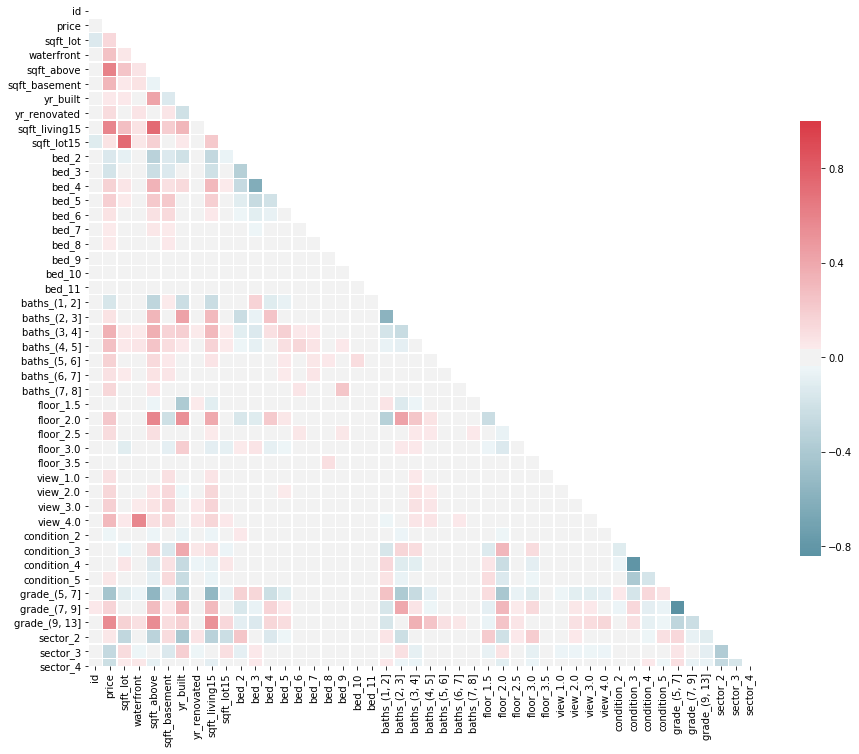

In [100]:
corr = last_df.corr()
mask = np.triu(np.ones_like(corr, dtype=np.bool))

f, ax = plt.subplots(figsize=(15, 20))

cmap = sns.diverging_palette(220, 10, as_cmap=True)

sns.heatmap(corr, mask=mask, cmap=cmap, vmax=1, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .4});

In [144]:
high_correlated_pairs(last_df)

,cc
pairs,
"(grade_(5, 7], grade_(7, 9])",0.840243
"(condition_3, condition_4)",0.812908


Our binned categories are showing substantial multi-collinearity even though we dropped the first dummy variable category. We will likely have to make some adjustments in our predictive model.

## Dealing with Continuous Variables
### Log-Transformations
Let's move to checking normality for our continuous variables. 



In [ ]:
norm_candidates = ['sqft_lot', 'sqft_above','sqft_living15','sqft_lot15']

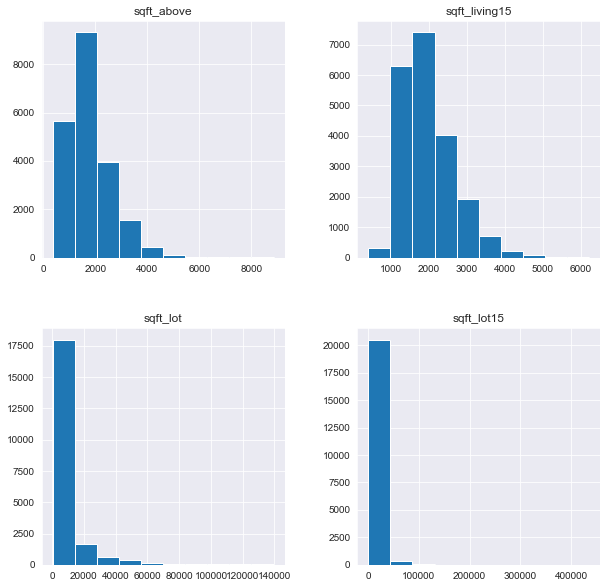

In [289]:
last_df[norm_candidates].hist(figsize=(10,10));

Our continuous variables don't have very normal distributions. sqft_living is almost there, but not quite. Let's normalize these variables and then check our model again.

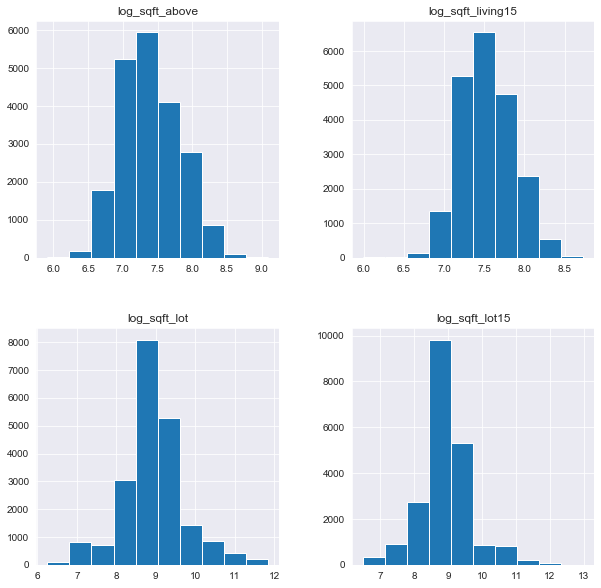

In [288]:
df_log = last_df.copy()

log_sqft_lot = np.log(last_df['sqft_lot'])
log_sqft_above = np.log(last_df['sqft_above'])
log_sqft_living15 = np.log(last_df['sqft_living15'])
log_sqft_lot15 = np.log(last_df['sqft_lot15'])

logs = ['log_sqft_above', 'log_sqft_living15' , 'log_sqft_lot', 'log_sqft_lot15']

df_log['log_sqft_above'] = log_sqft_above
df_log['log_sqft_living15'] = log_sqft_living15
df_log['log_sqft_lot'] = log_sqft_lot
df_log['log_sqft_lot15'] = log_sqft_lot15

df_log[logs].hist(figsize=(10,10));

Much better! Now let's drop the old columns.

In [290]:
df_log = df_log.drop(['sqft_lot', 'sqft_above','sqft_living15','sqft_lot15'], axis=1)
df_log.head()

,id,date,price,waterfront,sqft_basement,yr_built,yr_renovated,bed_2,bed_3,bed_4,...,grade_5_7,grade_7_9,grade_9_13,sector_2,sector_3,sector_4,log_sqft_above,log_sqft_living15,log_sqft_lot,log_sqft_lot15
0,7129300520,2014-10-13,221900.0,0.0,0.0,1955,0.0,0,1,0,...,1,0,0,1,0,0,7.073270,7.200425,8.639411,8.639411
1,6414100192,2014-12-09,538000.0,0.0,1.0,1951,1.0,0,1,0,...,1,0,0,1,0,0,7.682482,7.432484,8.887653,8.941022
2,5631500400,2015-02-25,180000.0,0.0,0.0,1933,0.0,1,0,0,...,1,0,0,0,0,0,6.646391,7.908387,9.210340,8.994917
3,2487200875,2014-12-09,604000.0,0.0,1.0,1965,0.0,0,0,1,...,1,0,0,1,0,0,6.956545,7.215240,8.517193,8.517193
4,1954400510,2015-02-18,510000.0,0.0,0.0,1987,0.0,0,1,0,...,0,1,0,0,0,0,7.426549,7.495542,8.997147,8.923058


# Explore the Data
Let's now gain insight into our data through visualizations, and begin to explore a few questions using the sale price as our dependent variable.

As part of this project is to predict the price of a house for a certain stakeholder, we are going to assume the stakeholder in our case is a renovation company who flips, or re-sells homes.

## How many bedrooms do the highest priced houses have on average? Which amount of bedrooms sell the most?

Let's start off by getting 5-point stats on our dataframe as of now.

In [292]:
df_log.describe()

,id,price,waterfront,sqft_basement,yr_built,yr_renovated,bed_2,bed_3,bed_4,bed_5,...,grade_5_7,grade_7_9,grade_9_13,sector_2,sector_3,sector_4,log_sqft_above,log_sqft_living15,log_sqft_lot,log_sqft_lot15
count,2.101600e+04,2.101600e+04,21016.000000,21016.000000,21016.000000,21016.000000,21016.000000,21016.000000,21016.000000,21016.000000,...,21016.000000,21016.000000,21016.000000,21016.000000,21016.000000,21016.000000,21016.000000,21016.000000,21016.000000,21016.000000
mean,4.622336e+09,5.394320e+05,0.006804,0.386801,1970.896603,0.034545,0.128283,0.453892,0.319804,0.074134,...,0.511134,0.403074,0.073658,0.369861,0.188713,0.112010,7.390584,7.536981,8.934093,8.917644
std,2.875085e+09,3.659997e+05,0.082209,0.487029,29.446672,0.182629,0.334413,0.497881,0.466412,0.261995,...,0.499888,0.490527,0.261220,0.482778,0.391290,0.315386,0.424109,0.327114,0.797053,0.738178
min,1.000102e+06,7.800000e+04,0.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.913503,5.988961,6.253829,6.478510
25%,2.153325e+09,3.220000e+05,0.000000,0.000000,1951.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.081709,7.299797,8.517393,8.532180
50%,3.977630e+09,4.500000e+05,0.000000,0.000000,1975.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.352441,7.512071,8.928707,8.930626
75%,7.345050e+09,6.410000e+05,0.000000,1.000000,1997.000000,0.000000,0.000000,1.000000,1.000000,0.000000,...,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,7.691657,7.766417,9.250618,9.204926
max,9.900000e+09,7.700000e+06,1.000000,1.000000,2015.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,9.089302,8.733916,11.845045,12.982476


Our price mean is a bit larger than our median, or 50% value. Something to consider later!

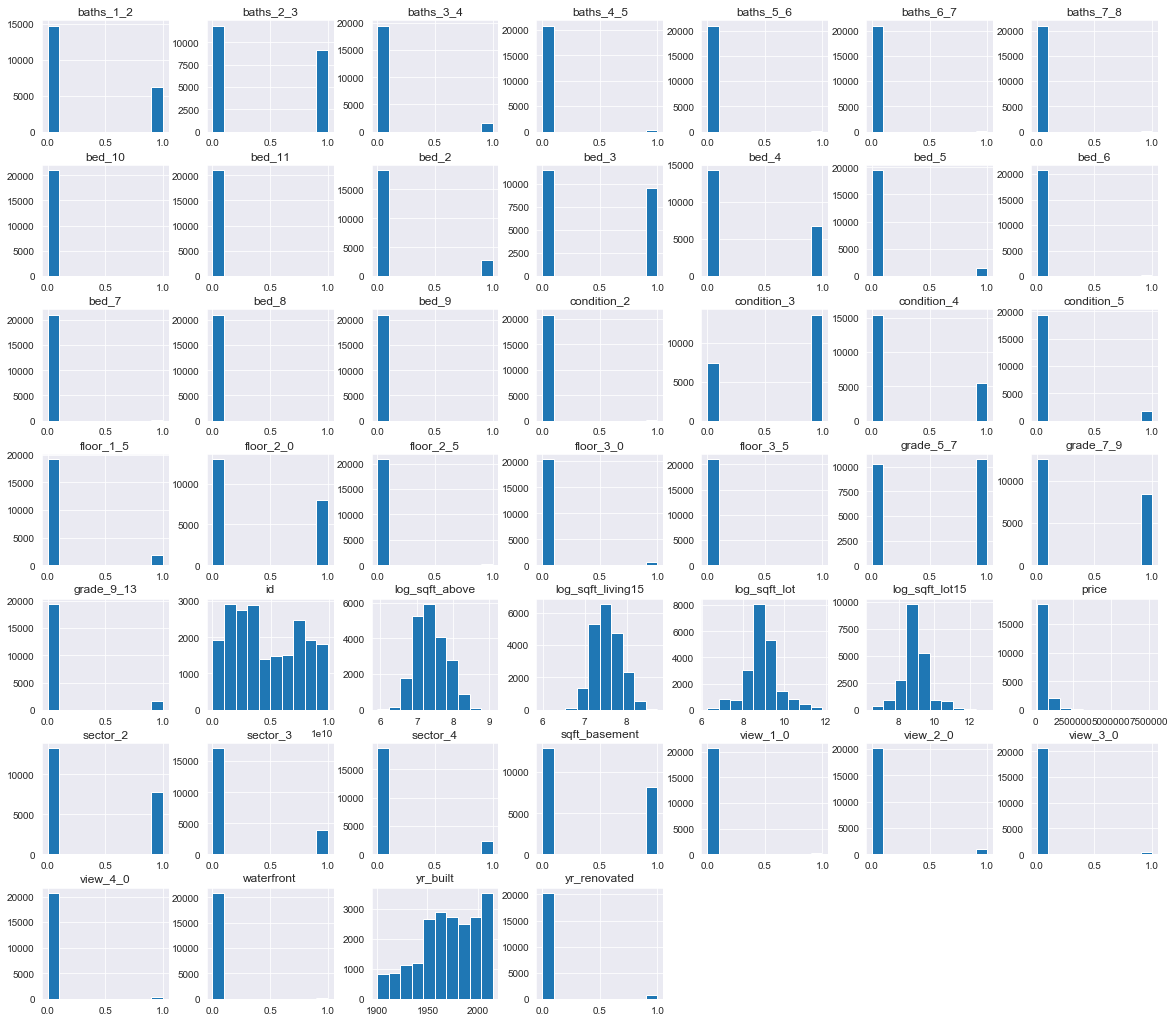

In [291]:
df_log.hist(figsize = (20,18));

Let's graph bedrooms to price, using our previous dataframe before the one-hot encoding so that each value is in the same frame.

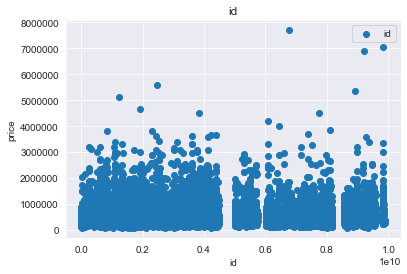

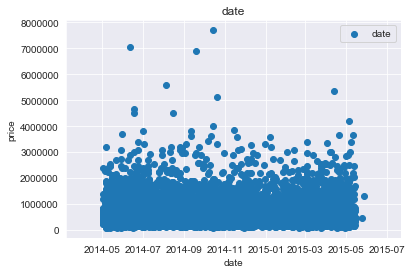

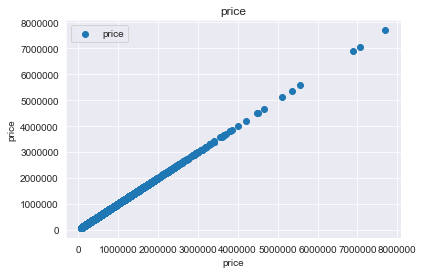

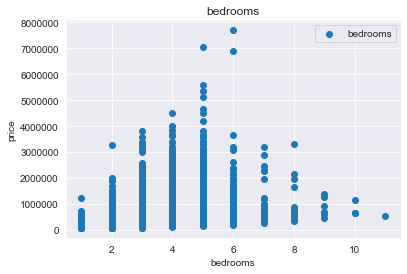

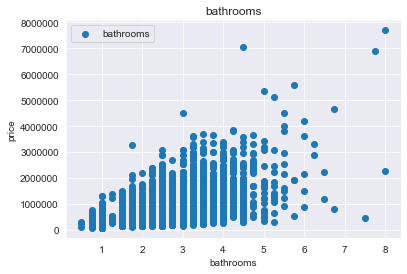

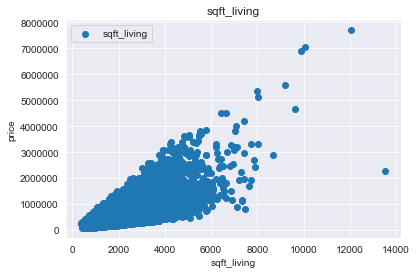

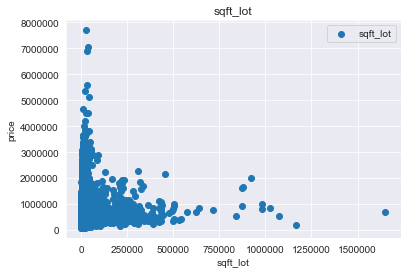

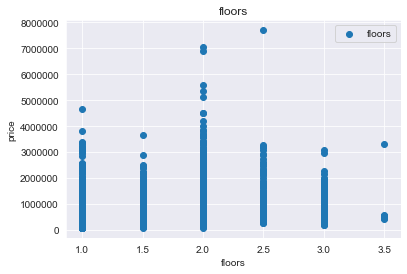

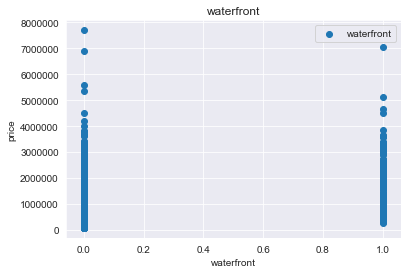

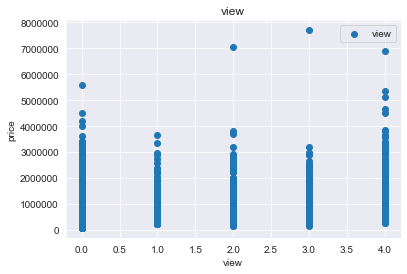

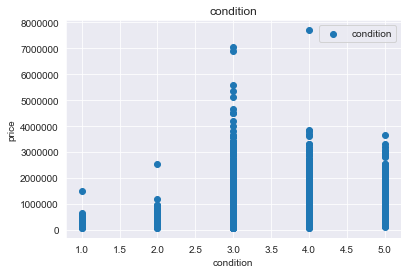

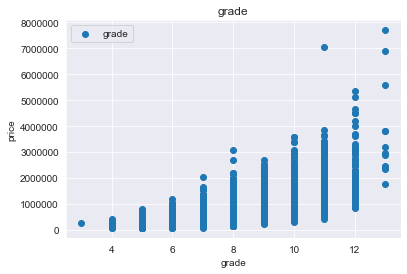

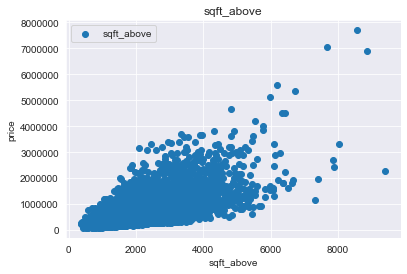

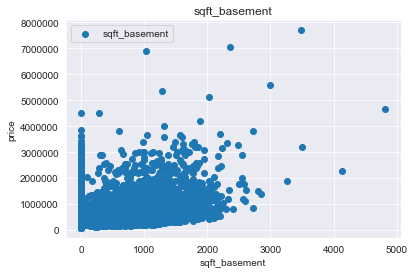

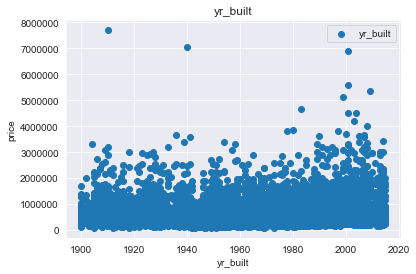

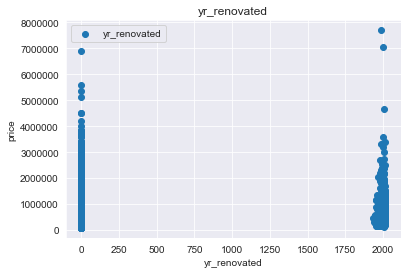

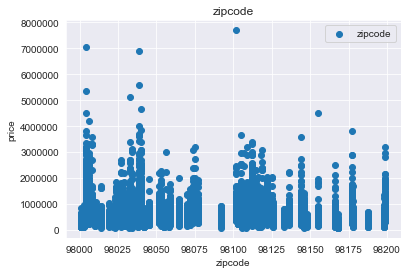

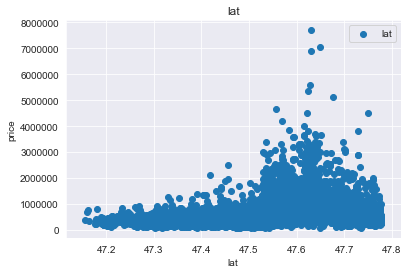

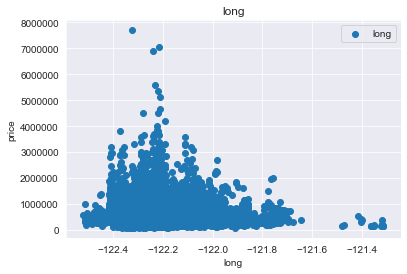

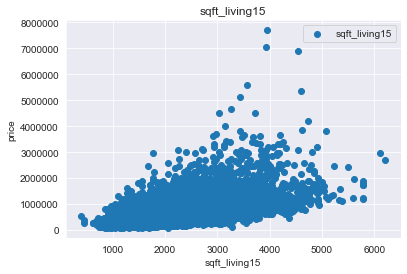

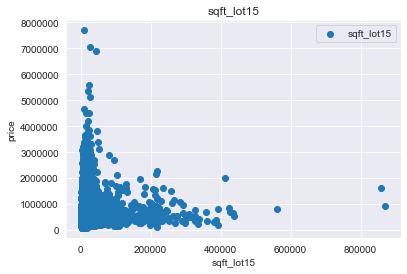

In [222]:
quick_scatter(df)


In [223]:
sns.set_style("darkgrid")


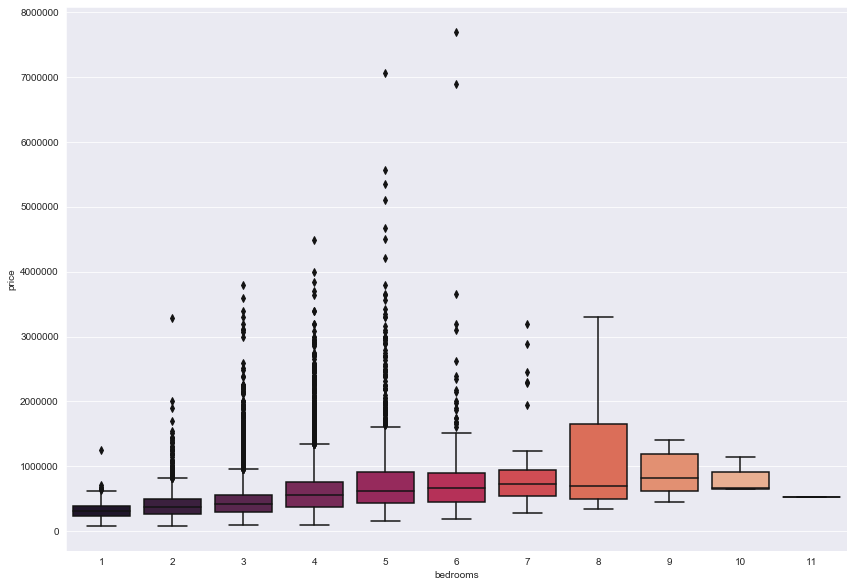

In [224]:
x = df.bedrooms
y1 = df.price
plt.figure(figsize=(14,10))
sns.boxplot(x=x, y=y1, palette="rocket", color="k")
plt.show()

Our plot is getting squished by some price outliers, making it hard to determine the mean of each category. Let's remove those and see what it looks like afterwards. 

In [225]:
drop_price_outliers_df = df[(np.abs(stats.zscore(df.price)) < 3)]


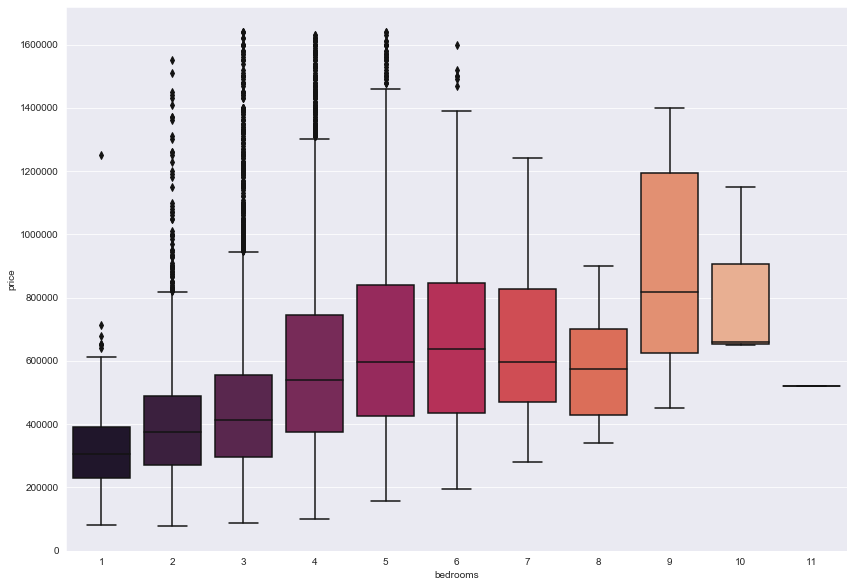

In [226]:
x = drop_price_outliers_df.bedrooms
y1 = drop_price_outliers_df.price
plt.figure(figsize=(14,10))
sns.boxplot(x=x, y=y1, palette="rocket", color="k")
plt.show()


Interesting! Our boxplot conflicts slightly with an initial interpretation of the quick scatterplot. The median prices go up until about 6 bedrooms, then the price dips down until 9 bedrooms where the price is higher than all. 

Is this conclusive enough to determine how many bedrooms should a house have in order to get a renovation company a sale? Just because a house's price is greater, doesn't mean it was sold the most. This is important to consider because many houses sit in the market for some time before a buyer is found.

Let's visualize the sheer number of sales by bedroom count.

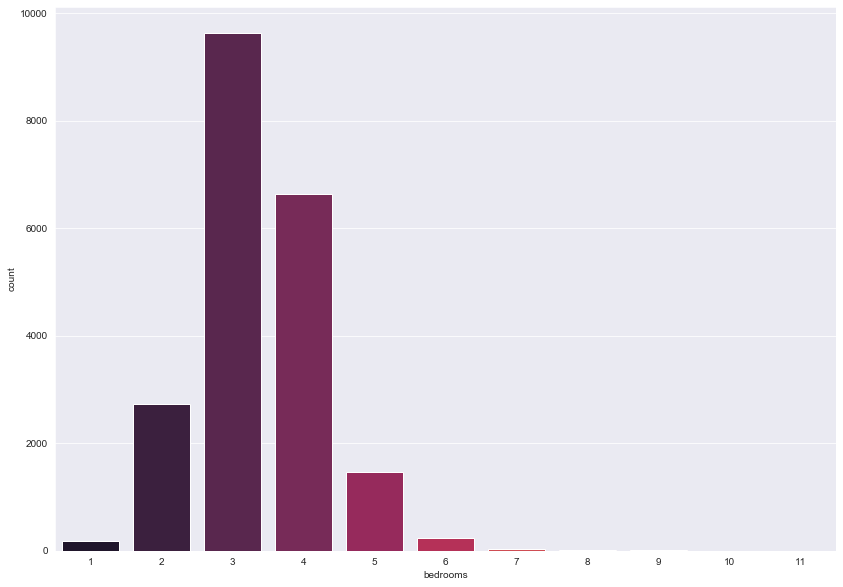

In [227]:
x = drop_price_outliers_df.bedrooms
plt.figure(figsize=(14,10))
sns.countplot(x=x, palette="rocket", color="k")
plt.show()

Here we can see that 3 and 4 bedroom homes sell the most (according to our dataset)! Homes with 5 and 6 bedrooms *sell less often* and the highest priced homes with 9 bedroom barely appear to sell at all in our market.

Judging by these two visualizations, a home with 4 bedrooms (maybe 5) might be a good in-between option for home renovation as the sale price is higher than 1-3 bedrooms, and is sold relatively frequently.

### Do bedrooms have a linear relation to price?

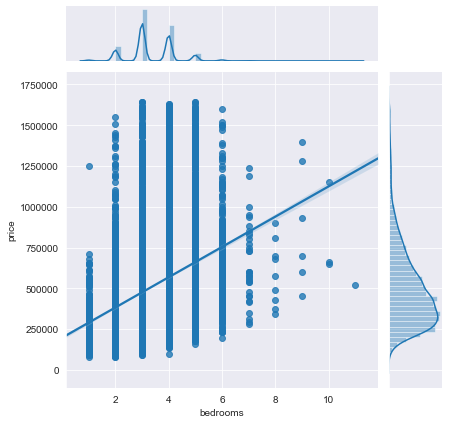

In [228]:
sns.jointplot('bedrooms','price', data=drop_price_outliers_df, kind='reg');

Number of bedrooms do appear to have an overall linear relation to price, although there are a bit of "noisy" price points.

## How many bathrooms do the highest priced houses have on average? Which amount of bathrooms sell the most?
Let's do the same thing as above, just with the bathrooms variable.

In [6]:
x = drop_price_outliers_df.bathrooms
y1 = drop_price_outliers_df.price
plt.figure(figsize=(14,10))
ax = sns.boxplot(x=x, y=y1, palette="rocket", color="k")
ax.set_title('Bathrooms vs Price in King County')
plt.show()

NameError: name 'drop_price_outliers_df' is not defined

It seems that the more bathrooms there are in general, the higher the price of the home goes. There is a dip in median and IQR for 5 bathroom homes, however.

Let's plot the frequency of sales by bathroom count.

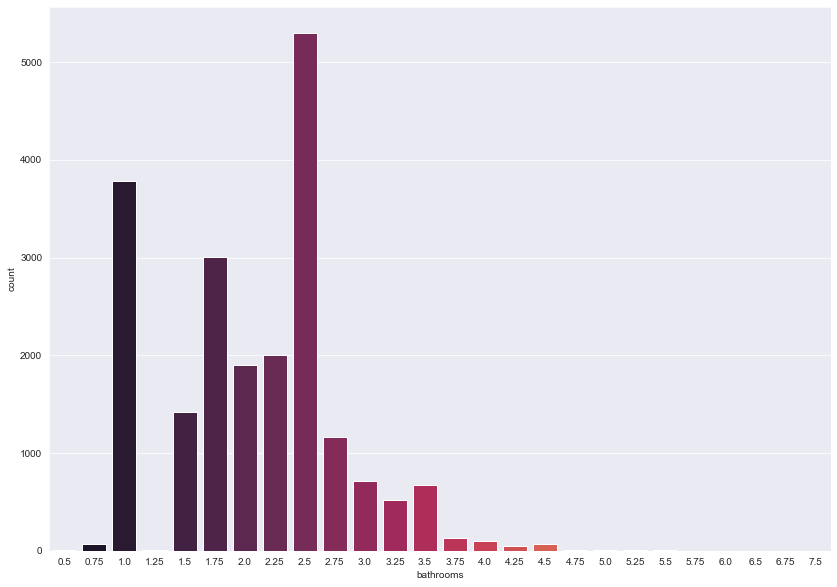

In [128]:
x = drop_price_outliers_df.bathrooms
plt.figure(figsize=(14,10))
sns.countplot(x=x, palette="rocket", color="k")
plt.show()


Another interesting finding- homes with 2.5 bathroom sell the most in our market, and homes with 1 bathroom sell the 2 second most. In seeming conjunction with our bedroom chart, those higher priced homes don't sell often at all. This makes sense as there are less high-priced homes sold (or perhaps in the market).

Let's visualize the sale frequency by price.

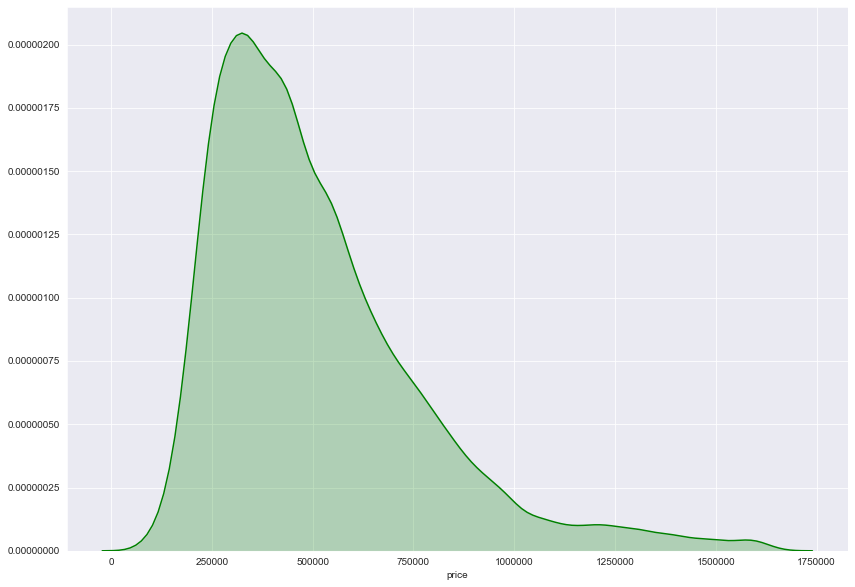

In [136]:
d = drop_price_outliers_df.price
plt.figure(figsize=(14,10))
sns.distplot(d, hist=False, color="g", kde_kws={"shade": True});

The price distribution is a bit skewed from normalcy, but it is clear that homes in the $250,000 - $500,000 range are selling the most.

### Do bathrooms have a linear relationship to sale price?

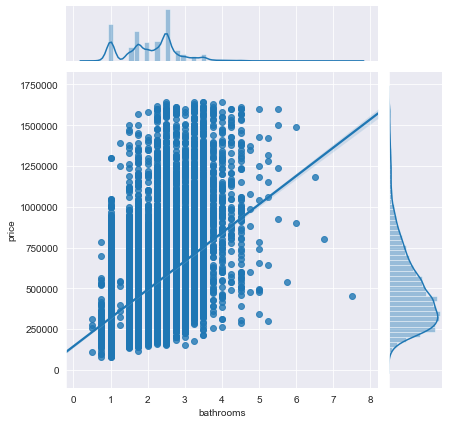

In [142]:
sns.jointplot('bathrooms','price', data=drop_price_outliers_df, kind='reg');

Number of bathrooms do appear to have an overall linear relation to price, although there are a bit of "noisy" price points here as well.

## Does square-footage have any relation to price?

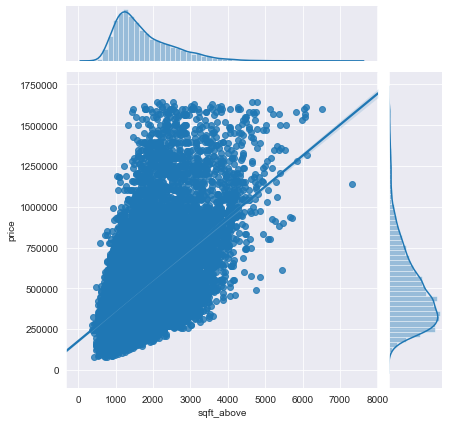

In [294]:
sns.jointplot('sqft_above','price', data=drop_price_outliers_df, kind='reg');

'sqft_above' has a stronger linear relation to price. This will likely be a part of our end prediction model.

Can we see to what extent does square footage apply to bathrooms?

# Initial Test/Train Split

In [331]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

data = df_log
y = data['price']
X = data.drop(['price','date','id'], axis = 1)

In [332]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [333]:
linreg = LinearRegression()
linreg.fit(X_train, y_train)

y_hat_train = linreg.predict(X_train)
y_hat_test = linreg.predict(X_test)

mse_train = np.sum((y_train-y_hat_train)**2)/len(y_train)
mse_test =np.sum((y_test-y_hat_test)**2)/len(y_test)
print('Train Mean Squarred Error:', mse_train)
print('Test Mean Squarred Error:', mse_test)

Train Mean Squarred Error: 38940886676.30909
Test Mean Squarred Error: 42922141011.85304


In [334]:
rmse_train = np.sqrt(mse_train)
rmse_test = np.sqrt(mse_test)
print('Train Root Mean Squarred Error:', rmse_train)
print('Test Root Mean Squarred Error:', rmse_test)

Train Root Mean Squarred Error: 197334.45385007933
Test Root Mean Squarred Error: 207176.59378378882


Our initial test train run has all of our columns in it, which is why our RMSE is quite large. Let's run our model and see if we can improve on this.

# Baseline Model & Refinement

In [3]:
import statsmodels.api as sm
import statsmodels.formula.api as smf
import scipy.stats as stats
import statsmodels.stats.api as sms
from statsmodels.formula.api import ols

In [296]:
df_log.head()

,id,date,price,waterfront,sqft_basement,yr_built,yr_renovated,bed_2,bed_3,bed_4,...,grade_5_7,grade_7_9,grade_9_13,sector_2,sector_3,sector_4,log_sqft_above,log_sqft_living15,log_sqft_lot,log_sqft_lot15
0,7129300520,2014-10-13,221900.0,0.0,0.0,1955,0.0,0,1,0,...,1,0,0,1,0,0,7.073270,7.200425,8.639411,8.639411
1,6414100192,2014-12-09,538000.0,0.0,1.0,1951,1.0,0,1,0,...,1,0,0,1,0,0,7.682482,7.432484,8.887653,8.941022
2,5631500400,2015-02-25,180000.0,0.0,0.0,1933,0.0,1,0,0,...,1,0,0,0,0,0,6.646391,7.908387,9.210340,8.994917
3,2487200875,2014-12-09,604000.0,0.0,1.0,1965,0.0,0,0,1,...,1,0,0,1,0,0,6.956545,7.215240,8.517193,8.517193
4,1954400510,2015-02-18,510000.0,0.0,0.0,1987,0.0,0,1,0,...,0,1,0,0,0,0,7.426549,7.495542,8.997147,8.923058


As a regression model will give us errors due to some of the characters in our current column names, let's run a function to clean them up.

In [299]:
subs = [(' ', ''), (']',''), ('.','_'), ('(',''), (')',''), (',','_')
       ]
def col_formatting(col):
    for old, new in subs:
        col = col.replace(old,new)
    return col

df_log.columns = [col_formatting(col) for col in df_log.columns]

In [300]:
list(df_log)

['id',
 'date',
 'price',
 'waterfront',
 'sqft_basement',
 'yr_built',
 'yr_renovated',
 'bed_2',
 'bed_3',
 'bed_4',
 'bed_5',
 'bed_6',
 'bed_7',
 'bed_8',
 'bed_9',
 'bed_10',
 'bed_11',
 'baths_1_2',
 'baths_2_3',
 'baths_3_4',
 'baths_4_5',
 'baths_5_6',
 'baths_6_7',
 'baths_7_8',
 'floor_1_5',
 'floor_2_0',
 'floor_2_5',
 'floor_3_0',
 'floor_3_5',
 'view_1_0',
 'view_2_0',
 'view_3_0',
 'view_4_0',
 'condition_2',
 'condition_3',
 'condition_4',
 'condition_5',
 'grade_5_7',
 'grade_7_9',
 'grade_9_13',
 'sector_2',
 'sector_3',
 'sector_4',
 'log_sqft_above',
 'log_sqft_living15',
 'log_sqft_lot',
 'log_sqft_lot15']

In [396]:
outcome = 'price'
x_cols = df_log.drop(['price','date','id'], axis=1).columns
predictors = '+'.join(x_cols)
f = outcome + '~' + predictors

model = smf.ols(formula=f, data=df_log).fit()
model.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                           Results: Ordinary least squares
=====================================================================================
Model:                     OLS                   Adj. R-squared:          0.704      
Dependent Variable:        price                 AIC:                     572573.9089
Date:                      2020-07-26 20:59      BIC:                     572931.7957
No. Observations:          21016                 Log-Likelihood:          -2.8624e+05
Df Model:                  44                    F-statistic:             1135.      
Df Residuals:              20971                 Prob (F-statistic):      0.00       
R-squared:                 0.704                 Scale:                   3.9701e+10 
-------------------------------------------------------------------------------------
                     Coef.       Std.Err.     t     P>|t|      [0.025       0.975]   
-------------------------------------------------------------------------------------
Intercept          775396.2657 176763.9379   4.3866 0.0000   428925.3168 1121867.2147
waterfront         544263.3511  20755.4748  26.2226 0.0000   503581.0200  584945.6821
sqft_basement       86525.4660   3822.7265  22.6345 0.0000    79032.6273   94018.3046
yr_built            -1715.5120     81.9119 -20.9434 0.0000    -1876.0656   -1554.9584
yr_renovated        81211.3889   8015.4598  10.1318 0.0000    65500.4695   96922.3082
bed_2              -13685.1157  15448.5205  -0.8859 0.3757   -43965.4072   16595.1759
bed_3              -37824.9445  15549.5849  -2.4325 0.0150   -68303.3299   -7346.5590
bed_4              -47998.3218  15930.9403  -3.0129 0.0026   -79224.1934  -16772.4503
bed_5              -31673.9073  16715.3440  -1.8949 0.0581   -64437.2706    1089.4559
bed_6             -105712.0396  20431.9393  -5.1739 0.0000  -145760.2162  -65663.8630
bed_7             -178322.1944  36839.1449  -4.8406 0.0000  -250529.7592 -106114.6296
bed_8              105843.0875  58072.8105   1.8226 0.0684    -7984.0992  219670.2742
bed_9             -849718.5129  85685.3509  -9.9167 0.0000 -1017668.4081 -681768.6176
bed_10            -359935.2694 117005.9650  -3.0762 0.0021  -589275.9835 -130594.5553
bed_11            -309842.7865 200150.4476  -1.5480 0.1216  -702153.0979   82467.5248
baths_1_2           -7105.4934   4853.4730  -1.4640 0.1432   -16618.6748    2407.6880
baths_2_3            1831.7780   6282.3631   0.2916 0.7706   -10482.1382   14145.6941
baths_3_4          122136.5472   9221.3676  13.2449 0.0000   104061.9556  140211.1387
baths_4_5          407354.6319  16719.0294  24.3647 0.0000   374584.0450  440125.2189
baths_5_6         1132862.1540  40774.7577  27.7834 0.0000  1052940.4846 1212783.8233
baths_6_7         1072551.2822  82510.7241  12.9989 0.0000   910823.9003 1234278.6641
baths_7_8         3858092.4458 119507.4319  32.2833 0.0000  3623848.6638 4092336.2279
floor_1_5          -26956.5085   5675.5427  -4.7496 0.0000   -38081.0099  -15832.0072
floor_2_0          -25480.2239   4867.8373  -5.2344 0.0000   -35021.5604  -15938.8874
floor_2_5          115658.8018  17014.6663   6.7976 0.0000    82308.7439  149008.8598
floor_3_0           25545.0587  10388.9765   2.4589 0.0139     5181.8636   45908.2537
floor_3_5          222522.2818  76054.2701   2.9258 0.0034    73450.0477  371594.5159
view_1_0           111983.5771  11281.2012   9.9266 0.0000    89871.5527  134095.6014
view_2_0            71616.1889   6925.5950  10.3408 0.0000    58041.4887   85190.8890
view_3_0           143596.5979   9585.3592  14.9808 0.0000   124808.5546  162384.6411
view_4_0           319251.8009  14428.0718  22.1271 0.0000   290971.6675  347531.9343
condition_2         68743.5027  41755.2640   1.6463 0.0997   -13100.0347  150587.0401
condition_3         75293.6667  38736.7755   1.9437 0.0519     -633.4003  151220.7337
condition_4        116269.3308  38746.6226   3.0008 0.0027    40322.9627  192215.6989
condition_5        162

Our baseline model is a decent start. Our adjusted R-squared value is already .704 which is not bad. 

Interestingly, 'view' has high coefficient although the scatterplot didn't indicate any correlation with price.

Also, our bedroom categories are showing high negative coefficients with high p-values. Perhaps this is due to outliers, which are included in this model. Let's try removing only outliers in price and run the model another time.

## Dropping outliers for the model

In [397]:
no_outliers_df = df_log[(np.abs(stats.zscore(df_log.price)) < 3)]

In [399]:
outcome = 'price'
x_cols = no_outliers_df.drop(['price','date','id'], axis=1).columns

predictors = '+'.join(x_cols)
f = outcome + '~' + predictors

model = smf.ols(formula=f, data=no_outliers_df).fit()
model.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                          Results: Ordinary least squares
====================================================================================
Model:                    OLS                   Adj. R-squared:          0.712      
Dependent Variable:       price                 AIC:                     546844.3162
Date:                     2020-07-26 21:00      BIC:                     547201.3513
No. Observations:         20622                 Log-Likelihood:          -2.7338e+05
Df Model:                 44                    F-statistic:             1158.      
Df Residuals:             20577                 Prob (F-statistic):      0.00       
R-squared:                0.712                 Scale:                   1.9186e+10 
------------------------------------------------------------------------------------
                     Coef.       Std.Err.     t     P>|t|     [0.025       0.975]   
------------------------------------------------------------------------------------
Intercept          851045.1765 124425.7070   6.8398 0.0000  607160.9265 1094929.4264
waterfront         213596.1501  18379.6419  11.6213 0.0000  177570.5949  249621.7054
sqft_basement       67685.5277   2689.5008  25.1666 0.0000   62413.8930   72957.1625
yr_built            -1514.1080     57.8609 -26.1681 0.0000   -1627.5200   -1400.6960
yr_renovated        56289.8462   5765.6749   9.7629 0.0000   44988.6663   67591.0260
bed_2               -6406.6951  10741.9374  -0.5964 0.5509  -27461.7440   14648.3537
bed_3              -25479.7921  10816.9495  -2.3555 0.0185  -46681.8705   -4277.7136
bed_4              -26698.9770  11086.9199  -2.4082 0.0160  -48430.2191   -4967.7350
bed_5              -21940.7694  11661.5801  -1.8815 0.0599  -44798.3909     916.8521
bed_6              -47259.8939  14419.2747  -3.2775 0.0010  -75522.8155  -18996.9723
bed_7             -126131.3459  27383.9328  -4.6060 0.0000 -179806.0251  -72456.6666
bed_8              -50810.8132  47620.9040  -1.0670 0.2860 -144151.5605   42529.9340
bed_9               49307.2611  63449.0342   0.7771 0.4371  -75057.8761  173672.3982
bed_10              55144.1526  82081.0533   0.6718 0.5017 -105741.2191  216029.5243
bed_11            -227685.8963 139149.2599  -1.6363 0.1018 -500429.4772   45057.6846
baths_1_2            5844.0656   3381.3062   1.7283 0.0839    -783.5626   12471.6938
baths_2_3           18199.9272   4390.1833   4.1456 0.0000    9594.8199   26805.0346
baths_3_4          103433.4752   6536.5566  15.8238 0.0000   90621.3061  116245.6444
baths_4_5          138110.9165  13615.3365  10.1438 0.0000  111423.7775  164798.0554
baths_5_6           71489.0227  43261.5739   1.6525 0.0985  -13307.0919  156285.1372
baths_6_7           64163.4696  99248.1595   0.6465 0.5180 -130370.7914  258697.7305
baths_7_8         -205774.4067 152106.5414  -1.3528 0.1761 -503915.2866   92366.4732
floor_1_5           -5333.3951   3974.9200  -1.3418 0.1797  -13124.5534    2457.7632
floor_2_0           -7524.5767   3429.0368  -2.1944 0.0282  -14245.7606    -803.3928
floor_2_5           36856.0816  12764.0499   2.8875 0.0039   11837.5319   61874.6313
floor_3_0           35593.1450   7313.0924   4.8670 0.0000   21258.9042   49927.3859
floor_3_5           23103.3384  56807.0086   0.4067 0.6842  -88242.9021  134449.5789
view_1_0            77565.8971   8142.4892   9.5261 0.0000   61605.9727   93525.8215
view_2_0            64659.6738   4936.9588  13.0971 0.0000   54982.8432   74336.5044
view_3_0           127204.9157   7018.2078  18.1250 0.0000  113448.6721  140961.1593
view_4_0           197925.4539  11231.2465  17.6228 0.0000  175911.3204  219939.5874
condition_2         39851.6571  29045.2916   1.3721 0.1701  -17079.4171   96782.7313
condition_3         59307.7982  26932.6354   2.2021 0.0277    6517.6975  112097.8988
condition_4         93432.7953  26940.1851   3.4682 0.0005   40627.8969  146237.6938
condition_5        133614.9477  27099.3531   4.9306 0.0000   80498.0

Dropping the price outliers increases our adjusted r-squared value by .01. However, the p-values for bedrooms are still too high. 

Remembering our exploration of bedrooms vs. price, after 6 bedrooms, the price is not so linear. Let's start with dropping the houses with over 7 bedrooms because of the high p-values there. 

In [403]:
outcome = 'price'
x_cols = no_outliers_df.drop(['price','date','id', 'bed_8', 'bed_9', 'bed_10', 'bed_11' ], axis=1).columns

predictors = '+'.join(x_cols)
f = outcome + '~' + predictors

model = smf.ols(formula=f, data=no_outliers_df).fit()
model.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                          Results: Ordinary least squares
====================================================================================
Model:                    OLS                   Adj. R-squared:          0.712      
Dependent Variable:       price                 AIC:                     546841.2980
Date:                     2020-07-26 21:02      BIC:                     547166.5967
No. Observations:         20622                 Log-Likelihood:          -2.7338e+05
Df Model:                 40                    F-statistic:             1273.      
Df Residuals:             20581                 Prob (F-statistic):      0.00       
R-squared:                0.712                 Scale:                   1.9187e+10 
------------------------------------------------------------------------------------
                     Coef.       Std.Err.     t     P>|t|     [0.025       0.975]   
------------------------------------------------------------------------------------
Intercept          851093.3031 124304.6063   6.8468 0.0000  607446.4227 1094740.1834
waterfront         213687.3950  18379.8766  11.6262 0.0000  177661.3802  249713.4099
sqft_basement       67597.0651   2682.0395  25.2036 0.0000   62340.0550   72854.0752
yr_built            -1514.4733     57.7909 -26.2061 0.0000   -1627.7481   -1401.1985
yr_renovated        56037.4118   5761.8667   9.7256 0.0000   44743.6964   67331.1273
bed_2               -4935.8122  10243.7850  -0.4818 0.6299  -25014.4427   15142.8183
bed_3              -23921.1471  10262.5340  -2.3309 0.0198  -44036.5270   -3805.7671
bed_4              -25096.1523  10507.3115  -2.3884 0.0169  -45691.3157   -4500.9890
bed_5              -20326.4846  11083.8518  -1.8339 0.0667  -42051.7125    1398.7434
bed_6              -45715.8561  13912.3421  -3.2860 0.0010  -72985.1494  -18446.5629
bed_7             -124775.4494  27085.7677  -4.6067 0.0000 -177865.7008  -71685.1980
baths_1_2            5812.8241   3379.9192   1.7198 0.0855    -812.0854   12437.7337
baths_2_3           18092.3473   4386.7175   4.1243 0.0000    9494.0334   26690.6613
baths_3_4          103305.6026   6531.5487  15.8164 0.0000   90503.2495  116107.9558
baths_4_5          138505.1502  13571.8771  10.2053 0.0000  111903.1954  165107.1051
baths_5_6           76728.5033  42623.2236   1.8002 0.0719   -6816.3931  160273.3996
baths_6_7           64406.0900  99250.2034   0.6489 0.5164 -130132.1748  258944.3548
baths_7_8         -154613.1253 139131.3284  -1.1113 0.2665 -427321.5561  118095.3054
floor_1_5           -5310.1153   3973.9933  -1.3362 0.1815  -13099.4570    2479.2265
floor_2_0           -7446.2015   3428.1087  -2.1721 0.0299  -14165.5663    -726.8368
floor_2_5           37794.9137  12733.5273   2.9681 0.0030   12836.1910   62753.6363
floor_3_0           35709.3987   7312.5241   4.8833 0.0000   21376.2719   50042.5255
floor_3_5           23239.6263  56808.2296   0.4091 0.6825  -88109.0061  134588.2587
view_1_0            77574.5224   8142.3122   9.5273 0.0000   61614.9452   93534.0996
view_2_0            64724.0089   4936.1547  13.1122 0.0000   55048.7544   74399.2634
view_3_0           127227.6552   7017.4146  18.1303 0.0000  113472.9664  140982.3440
view_4_0           197936.4229  11230.3607  17.6251 0.0000  175924.0259  219948.8200
condition_2         39816.9833  29045.6789   1.3708 0.1704  -17114.8493   96748.8159
condition_3         59228.2910  26932.1768   2.1992 0.0279    6439.0900  112017.4920
condition_4         93359.1445  26939.7995   3.4655 0.0005   40555.0023  146163.2867
condition_5        133541.3581  27099.3170   4.9278 0.0000   80424.5489  186658.1672
grade_5_7           20443.3242   9278.1954   2.2034 0.0276    2257.3259   38629.3225
grade_7_9          103000.3550   9776.6736  10.5353 0.0000   83837.3000  122163.4100
grade_9_13         297075.8493  11069.2234  26.8380 0.0000  275379.2942  318772.4044
sector_2             5225.9602   3139.4203   1.6646 0.0960    -927.5

No big changes. As some features still stick out with a p-value of over 0.05, which are skewing our model, let's just remove those and see if there are any improvements.

## Cleaning p-values of over 0.05

Here we are extracting the p-value table from our model summary and using it to subset our features with a p-value under 0.05.

In [404]:
summary = model.summary()
p_table = summary.tables[1]
p_table = pd.DataFrame(p_table.data)
p_table.columns = p_table.iloc[0]
p_table = p_table.drop(0)
p_table = p_table.set_index(p_table.columns[0])
p_table['P>|t|'] = p_table['P>|t|'].astype(float)
x_cols = list(p_table[p_table['P>|t|'] < 0.05].index)
x_cols.remove('Intercept')
print(len(p_table), len(x_cols))
print(x_cols)
p_table.head()

41 29
['waterfront', 'sqft_basement', 'yr_built', 'yr_renovated', 'bed_3', 'bed_4', 'bed_6', 'bed_7', 'baths_2_3', 'baths_3_4', 'baths_4_5', 'floor_2_0', 'floor_2_5', 'floor_3_0', 'view_1_0', 'view_2_0', 'view_3_0', 'view_4_0', 'condition_3', 'condition_4', 'condition_5', 'grade_5_7', 'grade_7_9', 'grade_9_13', 'sector_3', 'sector_4', 'log_sqft_above', 'log_sqft_living15', 'log_sqft_lot15']


,coef,std err,t,P>|t|,[0.025,0.975]
,,,,,,
Intercept,8.511e+05,1.24e+05,6.847,0.0,6.07e+05,1.09e+06
waterfront,2.137e+05,1.84e+04,11.626,0.0,1.78e+05,2.5e+05
sqft_basement,6.76e+04,2682.040,25.204,0.0,6.23e+04,7.29e+04
yr_built,-1514.4733,57.791,-26.206,0.0,-1627.748,-1401.198
yr_renovated,5.604e+04,5761.867,9.726,0.0,4.47e+04,6.73e+04


In [405]:
predictors = '+'.join(x_cols)
f = outcome + '~' + predictors
model = smf.ols(formula=f, data=no_outliers_df).fit()
model.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                          Results: Ordinary least squares
====================================================================================
Model:                    OLS                   Adj. R-squared:          0.712      
Dependent Variable:       price                 AIC:                     546841.4376
Date:                     2020-07-26 21:02      BIC:                     547079.4610
No. Observations:         20622                 Log-Likelihood:          -2.7339e+05
Df Model:                 29                    F-statistic:             1755.      
Df Residuals:             20592                 Prob (F-statistic):      0.00       
R-squared:                0.712                 Scale:                   1.9198e+10 
------------------------------------------------------------------------------------
                     Coef.       Std.Err.     t     P>|t|     [0.025       0.975]   
------------------------------------------------------------------------------------
Intercept          907363.3284 101152.2010   8.9703 0.0000  709097.0038 1105629.6530
waterfront         213789.2031  18357.3253  11.6460 0.0000  177807.3917  249771.0145
sqft_basement       68270.8785   2449.8654  27.8672 0.0000   63468.9482   73072.8087
yr_built            -1504.5845     50.0567 -30.0576 0.0000   -1602.6996   -1406.4694
yr_renovated        57189.8080   5727.2967   9.9855 0.0000   45963.8529   68415.7631
bed_3              -13085.7476   2636.7245  -4.9629 0.0000  -18253.9364   -7917.5588
bed_4              -12867.3882   3007.9484  -4.2778 0.0000  -18763.2053   -6971.5710
bed_6              -30734.8211   9503.2080  -3.2342 0.0012  -49361.8614  -12107.7808
bed_7             -103477.6346  24750.7819  -4.1808 0.0000 -151991.1272  -54964.1420
baths_2_3           11169.4206   2958.3347   3.7756 0.0002    5370.8503   16967.9910
baths_3_4           94503.9027   5295.2251  17.8470 0.0000   84124.8422  104882.9632
baths_4_5          129231.8136  12966.3167   9.9667 0.0000  103816.8061  154646.8211
floor_2_0           -4443.9775   3241.5783  -1.3709 0.1704  -10797.7277    1909.7727
floor_2_5           41607.9113  12626.4803   3.2953 0.0010   16859.0100   66356.8126
floor_3_0           40830.9822   7036.4287   5.8028 0.0000   27039.0246   54622.9398
view_1_0            79125.3640   8131.6165   9.7306 0.0000   63186.7517   95063.9762
view_2_0            65900.8003   4924.4211  13.3824 0.0000   56248.5449   75553.0558
view_3_0           128668.8647   7002.0151  18.3760 0.0000  114944.3605  142393.3688
view_4_0           199756.6651  11210.0841  17.8194 0.0000  177784.0124  221729.3178
condition_3         25060.4297  10579.1704   2.3688 0.0179    4324.4178   45796.4415
condition_4         58839.0960  10608.8984   5.5462 0.0000   38044.8150   79633.3770
condition_5         99333.7527  11012.4305   9.0201 0.0000   77748.5169  120918.9886
grade_5_7           22276.1901   9114.7915   2.4440 0.0145    4410.4770   40141.9032
grade_7_9          106061.8325   9605.0634  11.0423 0.0000   87235.1476  124888.5174
grade_9_13         301494.1934  10913.8801  27.6248 0.0000  280102.1241  322886.2628
sector_3          -189697.5337   2731.7282 -69.4423 0.0000 -195051.9373 -184343.1301
sector_4          -210271.6972   3233.7995 -65.0231 0.0000 -216610.2004 -203933.1941
log_sqft_above     213364.9981   4776.3787  44.6709 0.0000  204002.9175  222727.0786
log_sqft_living15  130721.5934   4999.3373  26.1478 0.0000  120922.4964  140520.6904
log_sqft_lot15      -9427.3415   1692.2094  -5.5710 0.0000  -12744.2060   -6110.4770
------------------------------------------------------------------------------------
Omnibus:                  4968.171            Durbin-Watson:               1.986    
Prob(Omnibus):            0.000               Jarque-Bera (JB):            20230.962
Skew:                     1.143               Prob(JB):                    0.000    
Kurtosis:                 7.281               Condition No.:        

Our r-squared hasn't changed but our coefficients are looking better. 1 additional feature has been identified with slight problems- floor_2_0. Let's drop that and try once more.

In [406]:
summary = model.summary()
p_table = summary.tables[1]
p_table = pd.DataFrame(p_table.data)
p_table.columns = p_table.iloc[0]
p_table = p_table.drop(0)
p_table = p_table.set_index(p_table.columns[0])
p_table['P>|t|'] = p_table['P>|t|'].astype(float)
x_cols = list(p_table[p_table['P>|t|'] < 0.05].index)
x_cols.remove('Intercept')
print(len(p_table), len(x_cols))
print(x_cols)
p_table.head()

30 28
['waterfront', 'sqft_basement', 'yr_built', 'yr_renovated', 'bed_3', 'bed_4', 'bed_6', 'bed_7', 'baths_2_3', 'baths_3_4', 'baths_4_5', 'floor_2_5', 'floor_3_0', 'view_1_0', 'view_2_0', 'view_3_0', 'view_4_0', 'condition_3', 'condition_4', 'condition_5', 'grade_5_7', 'grade_7_9', 'grade_9_13', 'sector_3', 'sector_4', 'log_sqft_above', 'log_sqft_living15', 'log_sqft_lot15']


,coef,std err,t,P>|t|,[0.025,0.975]
,,,,,,
Intercept,9.074e+05,1.01e+05,8.970,0.0,7.09e+05,1.11e+06
waterfront,2.138e+05,1.84e+04,11.646,0.0,1.78e+05,2.5e+05
sqft_basement,6.827e+04,2449.865,27.867,0.0,6.35e+04,7.31e+04
yr_built,-1504.5845,50.057,-30.058,0.0,-1602.700,-1406.469
yr_renovated,5.719e+04,5727.297,9.985,0.0,4.6e+04,6.84e+04


In [349]:
outcome = 'price'
predictors = '+'.join(x_cols)
f = outcome + '~' + predictors

model = smf.ols(formula=f, data=no_outliers_df).fit()
model.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                          Results: Ordinary least squares
===================================================================================
Model:                   OLS                   Adj. R-squared:          0.711      
Dependent Variable:      price                 AIC:                     546841.3197
Date:                    2020-07-26 20:42      BIC:                     547071.4090
No. Observations:        20622                 Log-Likelihood:          -2.7339e+05
Df Model:                28                    F-statistic:             1817.      
Df Residuals:            20593                 Prob (F-statistic):      0.00       
R-squared:               0.712                 Scale:                   1.9198e+10 
-----------------------------------------------------------------------------------
                     Coef.      Std.Err.     t     P>|t|     [0.025       0.975]   
-----------------------------------------------------------------------------------
Intercept          944683.3561 97422.3449   9.6968 0.0000  753727.8453 1135638.8669
waterfront         212760.8886 18342.3862  11.5994 0.0000  176808.3591  248713.4181
sqft_basement       68975.2336  2395.4367  28.7944 0.0000   64279.9880   73670.4791
yr_built            -1522.1684    48.3866 -31.4585 0.0000   -1617.0099   -1427.3268
yr_renovated        56693.7414  5715.9767   9.9185 0.0000   45489.9745   67897.5084
bed_3              -12963.8030  2635.2799  -4.9193 0.0000  -18129.1604   -7798.4456
bed_4              -12735.6628  3006.4776  -4.2361 0.0000  -18628.5970   -6842.7286
bed_6              -30334.0509  9498.9134  -3.1934 0.0014  -48952.6734  -11715.4284
bed_7             -102594.4377 24742.9245  -4.1464 0.0000 -151092.5292  -54096.3463
baths_2_3           10095.9804  2852.8934   3.5389 0.0004    4504.0835   15687.8774
baths_3_4           93129.2728  5199.5345  17.9111 0.0000   82937.7735  103320.7721
baths_4_5          127898.1766 12930.0492   9.8915 0.0000  102554.2562  153242.0970
floor_2_5           44825.5277 12406.6926   3.6130 0.0003   20507.4278   69143.6276
floor_3_0           44915.6552  6374.6139   7.0460 0.0000   32420.9071   57410.4033
view_1_0            79181.5331  8131.6869   9.7374 0.0000   63242.7829   95120.2833
view_2_0            65929.0395  4924.4832  13.3880 0.0000   56276.6625   75581.4166
view_3_0           128775.4521  7001.7329  18.3919 0.0000  115051.5011  142499.4032
view_4_0           199900.5444 11209.8322  17.8326 0.0000  177928.3856  221872.7032
condition_3         25181.1312 10579.0299   2.3803 0.0173    4445.3948   45916.8677
condition_4         59263.8744 10604.5991   5.5885 0.0000   38478.0204   80049.7284
condition_5         99747.5026 11008.5292   9.0609 0.0000   78169.9136  121325.0916
grade_5_7           22774.7526  9107.7282   2.5006 0.0124    4922.8842   40626.6210
grade_7_9          106333.8993  9603.2180  11.0727 0.0000   87510.8314  125156.9671
grade_9_13         301577.3742 10913.9445  27.6323 0.0000  280185.1788  322969.5697
sector_3          -189662.4276  2731.6665 -69.4310 0.0000 -195016.7103 -184308.1450
sector_4          -210045.9170  3229.6721 -65.0363 0.0000 -216376.3300 -203715.5040
log_sqft_above     211544.1564  4588.0967  46.1072 0.0000  202551.1236  220537.1892
log_sqft_living15  130982.1679  4995.8295  26.2183 0.0000  121189.9465  140774.3892
log_sqft_lot15      -8689.0052  1604.2535  -5.4162 0.0000  -11833.4692   -5544.5413
-----------------------------------------------------------------------------------
Omnibus:                   4974.881           Durbin-Watson:              1.986    
Prob(Omnibus):             0.000              Jarque-Bera (JB):           20290.668
Skew:                      1.144              Prob(JB):                   0.000    
Kurtosis:                  7.288              Condition No.:              199228   
===================================================================================
* The condition number is lar

No remaining variables with high p-values now. 
The 3 strongest positive coefficients are:

grade_9_13	301577.3742

waterfront  212760.8886

log_sqft_above	211544.1564

# Post-Model Test/Train Split
Let's split our last dataframe and perform the 80/20 test/train split again.

In [345]:
list(no_outliers_df)

['id',
 'date',
 'price',
 'waterfront',
 'sqft_basement',
 'yr_built',
 'yr_renovated',
 'bed_2',
 'bed_3',
 'bed_4',
 'bed_5',
 'bed_6',
 'bed_7',
 'bed_8',
 'bed_9',
 'bed_10',
 'bed_11',
 'baths_1_2',
 'baths_2_3',
 'baths_3_4',
 'baths_4_5',
 'baths_5_6',
 'baths_6_7',
 'baths_7_8',
 'floor_1_5',
 'floor_2_0',
 'floor_2_5',
 'floor_3_0',
 'floor_3_5',
 'view_1_0',
 'view_2_0',
 'view_3_0',
 'view_4_0',
 'condition_2',
 'condition_3',
 'condition_4',
 'condition_5',
 'grade_5_7',
 'grade_7_9',
 'grade_9_13',
 'sector_2',
 'sector_3',
 'sector_4',
 'log_sqft_above',
 'log_sqft_living15',
 'log_sqft_lot',
 'log_sqft_lot15']

In [327]:
x_cols

['waterfront',
 'sqft_basement',
 'yr_built',
 'yr_renovated',
 'bed_3',
 'bed_4',
 'bed_6',
 'bed_7',
 'baths_2_3',
 'baths_3_4',
 'baths_4_5',
 'floor_2_5',
 'floor_3_0',
 'view_1_0',
 'view_2_0',
 'view_3_0',
 'view_4_0',
 'condition_3',
 'condition_4',
 'condition_5',
 'grade_5_7',
 'grade_7_9',
 'grade_9_13',
 'sector_3',
 'sector_4',
 'log_sqft_above',
 'log_sqft_living15',
 'log_sqft_lot15']

In [385]:
y = data['price']
X = data.drop(['id','date','price','bed_2','bed_5','bed_8','bed_9','bed_10',
               'bed_11','baths_1_2','baths_5_6','baths_6_7','baths_7_8',
               'floor_1_5','floor_3_5','condition_2','sector_2','log_sqft_lot' ]
              , axis = 1)

In [386]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [387]:
len(X_test)

4125

In [388]:
linreg = LinearRegression()
linreg.fit(X_train, y_train)

y_hat_train = linreg.predict(X_train)
y_hat_test = linreg.predict(X_test)

mse_train = np.sum((y_train-y_hat_train)**2)/len(y_train)
mse_test =np.sum((y_test-y_hat_test)**2)/len(y_test)
print('Train Mean Squarred Error:', mse_train)
print('Test Mean Squarred Error:', mse_test)

Train Mean Squarred Error: 19347510916.9707
Test Mean Squarred Error: 18513014118.52777


In [389]:
rmse_train = np.sqrt(mse_train)
rmse_test = np.sqrt(mse_test)
print('Train Root Mean Squarred Error:', rmse_train)
print('Test Root Mean Squarred Error:', rmse_test)

Train Root Mean Squarred Error: 139095.3303205061
Test Root Mean Squarred Error: 136062.5375278874


Our RMSE is much lower now, by 60,000. The Train and Test RSMEs are close to each other which is good.
For every change in X, our Y (Price) will fluctuate about 136,000.

# Cross-Validation
Let's do a 10-fold cross validation of our test/train split and see how the prediction stands up.

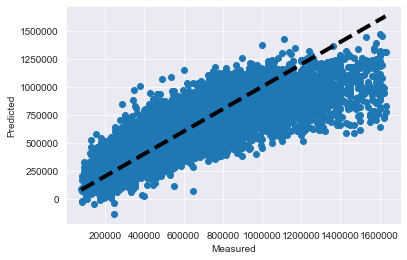

In [390]:
from sklearn.model_selection import cross_val_predict

predicted = cross_val_predict(linreg, X, y, cv=10)

fig, ax = plt.subplots()
ax.scatter(y, predicted)
ax.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=4)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.show()

Decent. The values dip off slightly at the higher measurements however.

# Checking Normality Assumption 

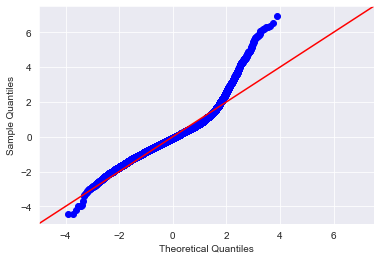

In [392]:
fig = sm.graphics.qqplot(model.resid, dist=stats.norm, line='45', fit=True)

Our qqplot is doing well in the lower range, yet it is telling us that linear regression is failing to explain variance above 2 sample/theoretical quantities.


# Conclusions

Our multiple linear regression model is not so bad with an end adjusted r-squared value of .711. Our Train and Test Root Mean Squared Error are decent at 136,000. This means that for every unit change in y, our target variable, price, will adjust 136,000 dollars. 

In our final model, the 3 strongest predictor of price were: sqft-above (the square footage of the home, not including the basement), grade (the overall grade given to the housing unit, based on King County grading system), and waterfront (whether or not the property is situated on the water).


One of our initial EDA hypotheses was not so accurate. The number of bedrooms or bathrooms don't tend to predict the price of a home as well as something like grade, which is the classification of construction quality and workmanship.

Even with outliers removed, however, some variance is still prominent in the high price ranges as seen in out qqplot. Further analysis is recommended. More specific exploration into further adjusting features can potentially strengthen the normality of the models predictions in the upper price range.

# Visualizations of Strongest Predictors
## Grade vs Price

In [49]:
predictors_df = cleaned_df[(np.abs(stats.zscore(cleaned_df.price)) < 3)]

In [50]:
sns.set_style("darkgrid")

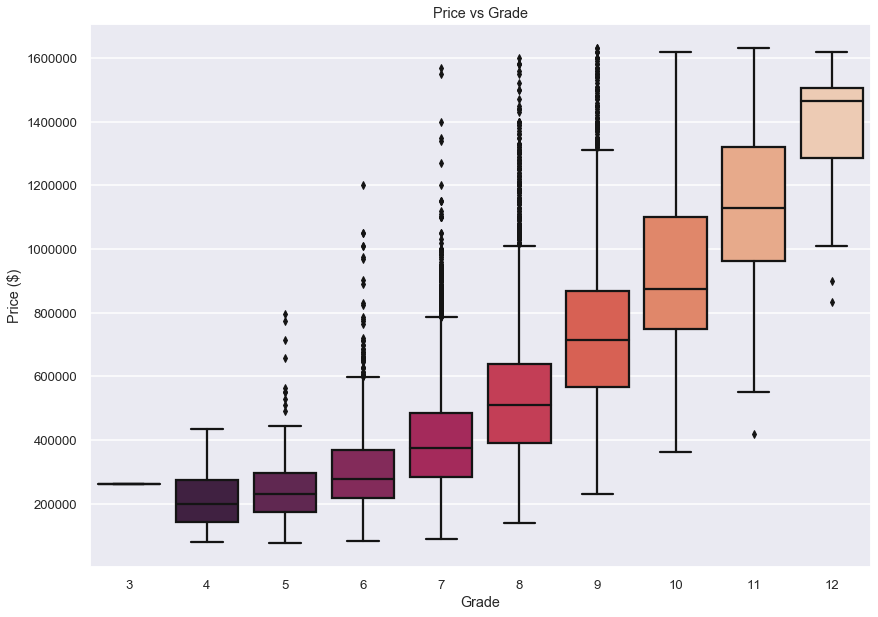

In [51]:
plt.figure(figsize=(14,10))
sns.set_context("talk", font_scale=0.8)
x = predictors_df.grade
y1 = predictors_df.price
ax = sns.boxplot(x=x, y=y1, palette="rocket", color="k")
ax.set_title('Price vs Grade')
ax.set_xlabel('Grade')
ax.set_ylabel('Price ($)')
plt.show()

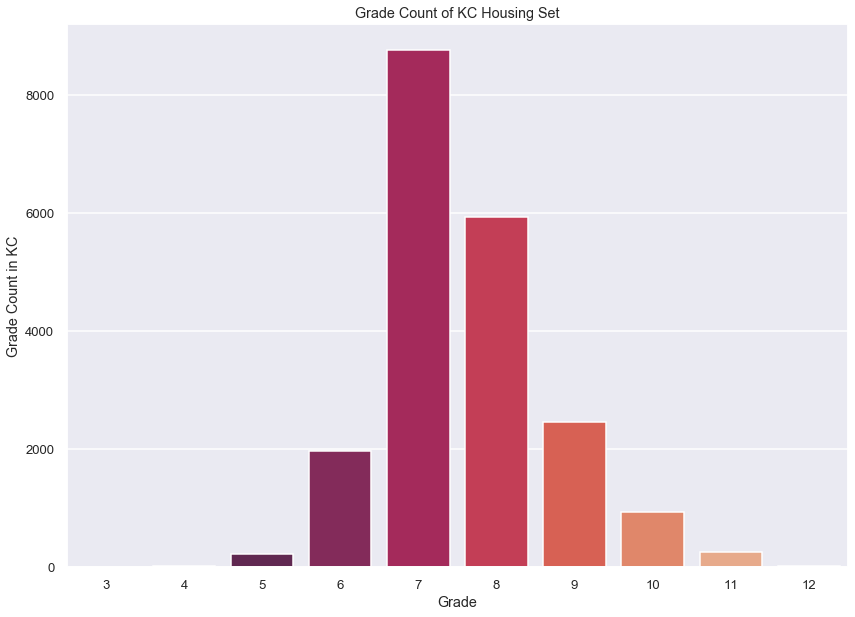

In [52]:
sns.set_context("talk", font_scale=0.8) 
plt.figure(figsize=(14,10))
x = predictors_df.grade
ax = sns.countplot(x=x, palette="rocket", color="k")
ax.set_title('Grade Count of KC Housing Set')
ax.set_xlabel('Grade')
ax.set_ylabel('Grade Count in KC')

plt.show()

## Sqft-Above vs. Price

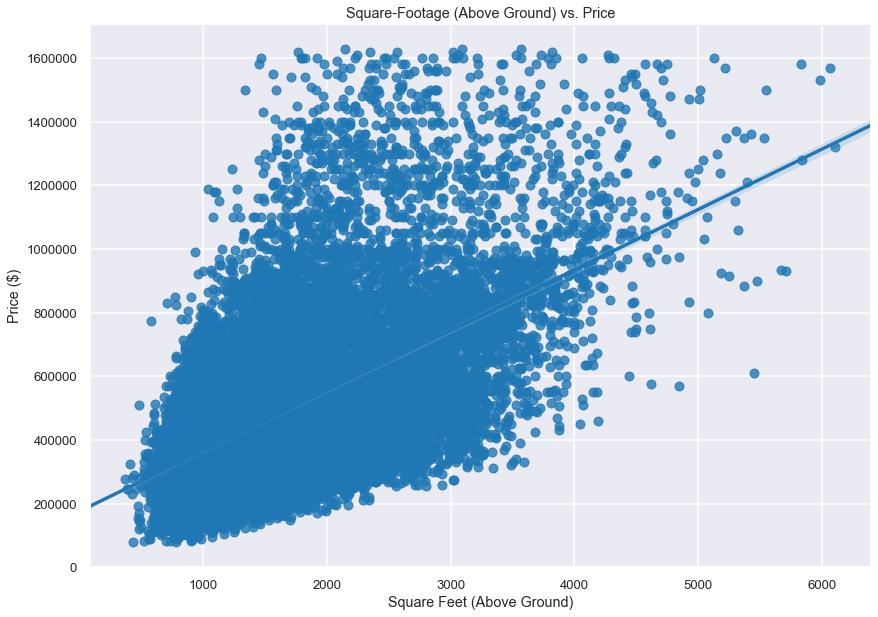

In [53]:
plt.figure(figsize=(14,10))
sns.set_context("talk", font_scale=0.8)   
ax = sns.regplot(x='sqft_above', y='price', data=predictors_df)
ax.set_title('Square-Footage (Above Ground) vs. Price')
ax.set_xlabel('Square Feet (Above Ground)')
ax.set_ylabel('Price ($)');

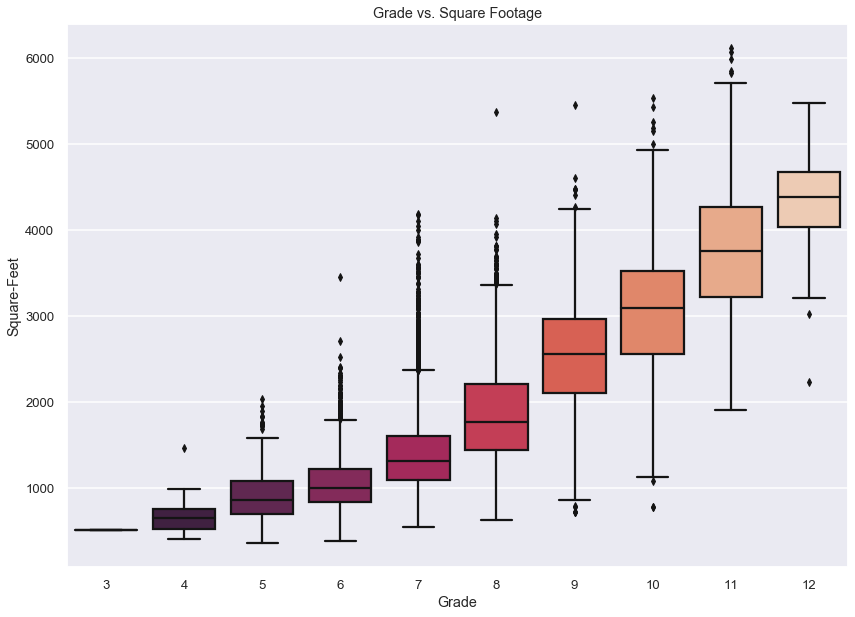

In [54]:
plt.figure(figsize=(14,10))
sns.set_context("talk", font_scale=0.8)
x = predictors_df.grade
y1 = predictors_df.sqft_above
ax = sns.boxplot(x=x, y=y1, palette="rocket", color="k")
ax.set_title('Grade vs. Square Footage')
ax.set_xlabel('Grade')
ax.set_ylabel('Square-Feet')
plt.show()

Here we can see there is potential for picking a good candidate for renovation. Some houses with lower grades (lower prices) do share the amount of square footage as homes with higher grades. Considering such, a good pick would be a lower grade home (5-6) and renovating it, thereby increasing the grade hopefully (7-10) and subsequent price, without altering the square-footage.

## Waterfront

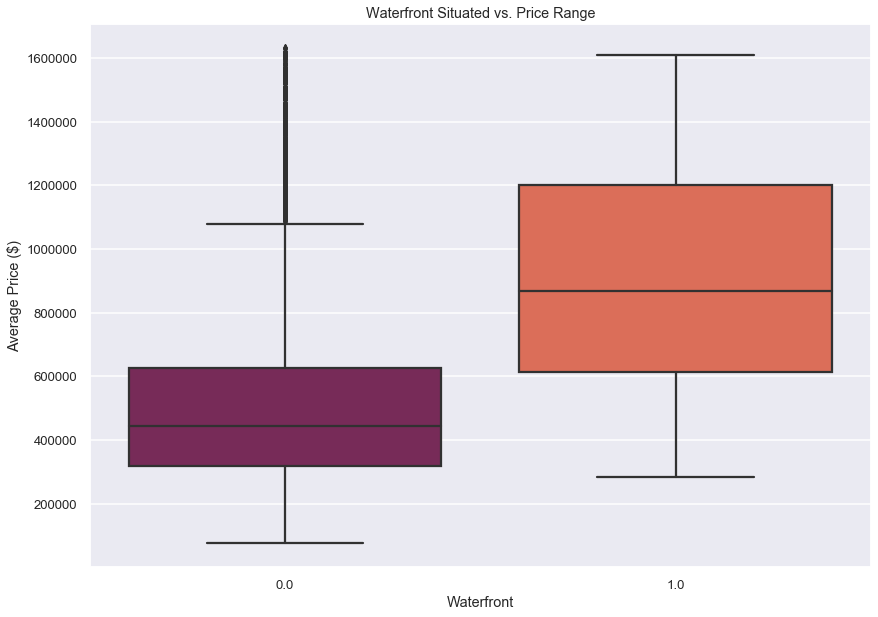

In [55]:
plt.figure(figsize=(14,10))
sns.set_context("talk", font_scale=0.8)
x = predictors_df.waterfront
y1 = predictors_df.price
ax = sns.boxplot(x=x, y=y1, palette="rocket", color="k")
ax.set_title('Waterfront Situated vs. Price Range')
ax.set_xlabel('Waterfront')
ax.set_ylabel('Average Price ($)')
plt.show()

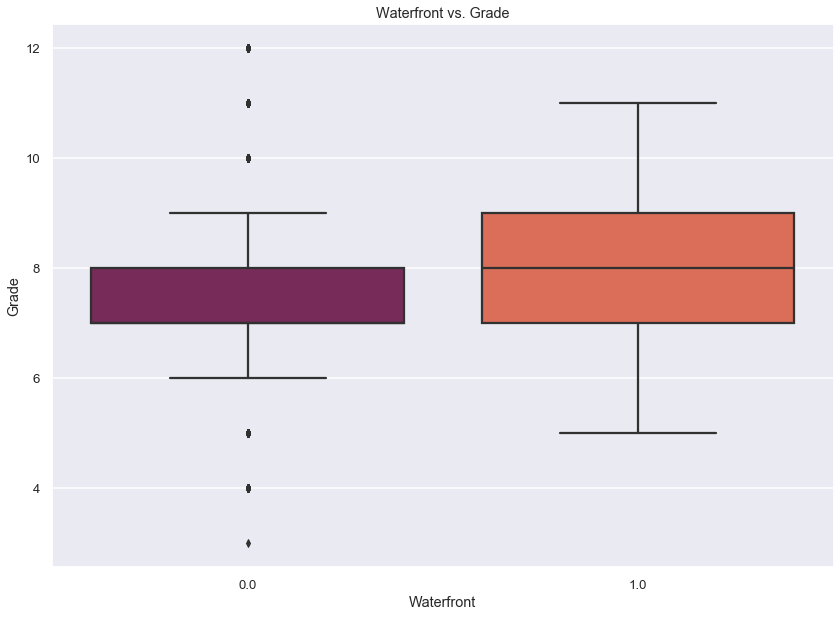

In [65]:
plt.figure(figsize=(14,10))
sns.set_context("talk", font_scale=0.8)
x = predictors_df.waterfront
y1 = predictors_df.grade
ax = sns.boxplot(x=x, y=y1, palette="rocket", color="k")
ax.set_title('Waterfront vs. Grade')
ax.set_xlabel('Waterfront')
ax.set_ylabel('Grade')
plt.show()

Interestingly, this boxplot of waterfront vs grade tells us that the range of grades for waterfront seems to be greater than non-waterfront. Surely waterfront homes are more expensive (likely higher grade), but there are lower grade waterfront homes in existence.